# </br> <font color= 'green' size = 4> <b>   &emsp;&emsp; &emsp;&emsp; &emsp;&emsp; &emsp;&emsp; &emsp;&emsp; &emsp;&emsp;&emsp;Lead Scoring Case Study  </b> </font>


</br> <B> <font color ='blue'> Business Objective </font> </B> 

</br> <font color ='blue'> Help company X in selecting the most promising leads, i.e. the leads that are most likely to convert into paying customers

  <br> Data analysis tasks: </br>
  <br> </br>
 <br> 1. Data cleaning and formating  </br>
 <br> </br>
 <br> 2. Univariate / Bivariate analysis </br> 
 <br> </br>
 <br> 3. Outliers treatment </br> 
 <br> </br>
 <br> 4. Create Dummy data / binary data </br>
 <br> </br>
 <br> 5. Test-train split of the data </br>
 <br> </br>
 <br> 6. standardization of the scales of  variables </br>
 <br> </br>
 <br> 7. Model Building </br>
 <br> </br>
 <br> 8. Making predictions on the test set</br>
 <br> </br>
 <br> 9. Output </br>
 <br> </br>


## 1. Data cleaning and formating 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the lead data set
Lead_data_df = pd.read_csv(r"Leads.csv")

In [3]:
# Review the dataset

Lead_data_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [4]:
# Review the shape , info, coulmns about dataframe

print(Lead_data_df.shape)
print(Lead_data_df.info())
print(Lead_data_df.columns)
print(Lead_data_df.describe())

(9240, 37)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
Prospect ID                                      9240 non-null object
Lead Number                                      9240 non-null int64
Lead Origin                                      9240 non-null object
Lead Source                                      9204 non-null object
Do Not Email                                     9240 non-null object
Do Not Call                                      9240 non-null object
Converted                                        9240 non-null int64
TotalVisits                                      9103 non-null float64
Total Time Spent on Website                      9240 non-null int64
Page Views Per Visit                             9103 non-null float64
Last Activity                                    9137 non-null object
Country                                          6779 non-null object
Specialization                             

In [5]:
#  check for duplicate records in dataframe

Lead_data_df[Lead_data_df['Prospect ID'].duplicated()]

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity


<B> There are no duplicates present in this dataframe </B>

In [6]:
# Review the null values percentages in each column

round((Lead_data_df.isnull().sum()/len(Lead_data_df)*100),2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [7]:
# Review the distinct value count for each column to check for the variance

col_names = Lead_data_df.columns
item_list = ['Prospect ID', 'Lead Number','TotalVisits',
             'Total Time Spent on Website', 'Page Views Per Visit']

item_list = [e for e in col_names if e not in item_list]

for e in item_list:
    print('--'*30)
    print(e)
    print('--'*30)
    print(Lead_data_df[e].value_counts())

------------------------------------------------------------
Lead Origin
------------------------------------------------------------
Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64
------------------------------------------------------------
Lead Source
------------------------------------------------------------
Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Live Chat               2
Social Media            2
Press_Release           2
testone                 1
youtubechannel          1
welearnblog_Home        1
Pay per Click Ads       1
blog                    1
WeLearn                 1
NC_EDM              

#### After going throught the above data we have notice that there are no varations with the data for the  columns  'Do Not Email','Do Not Call', 'What matters most to you in choosing a course', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 'Get updates on DM Content', 'I agree to pay the amount through cheque'.

In [8]:
# Bringing all the identified insignificant columns into a place for better representation and
# ease of identifying 
item_list = ['Do Not Email','Do Not Call','What matters most to you in choosing a course','Search','Magazine','Newspaper Article','X Education Forums','Newspaper','Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses','Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque']


for e in item_list:
    print('--'*30)
    print(e)
    print('--'*30)
    print(Lead_data_df[e].value_counts())


------------------------------------------------------------
Do Not Email
------------------------------------------------------------
No     8506
Yes     734
Name: Do Not Email, dtype: int64
------------------------------------------------------------
Do Not Call
------------------------------------------------------------
No     9238
Yes       2
Name: Do Not Call, dtype: int64
------------------------------------------------------------
What matters most to you in choosing a course
------------------------------------------------------------
Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64
------------------------------------------------------------
Search
------------------------------------------------------------
No     9226
Yes      14
Name: Search, dtype: int64
------------------------------------------------------------
Magazine
--------------------------------

#### As it is clearly visible that above columns are insignificant, we have decided to drop them

In [9]:
# Remove the columns with low variance from the dataframe 'Lead_data_df'

col_list = ['Do Not Email','Do Not Call','What matters most to you in choosing a course','Search','Magazine','Newspaper Article','X Education Forums','Newspaper','Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses','Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque']

Lead_data_df.drop(columns=col_list,inplace=True)

In [10]:
# there are spelling errors present in 'Lead Source' column i.e 'Google' and 'google'
# So data is manipulated accordingly


print (len(Lead_data_df.loc[Lead_data_df['Lead Source'] == 'Google','Lead Source']))

Lead_data_df.loc[Lead_data_df['Lead Source'] == 'google','Lead Source'] = 'Google'

print('Rows count after correcting the data')
print (len(Lead_data_df.loc[Lead_data_df['Lead Source'] == 'Google','Lead Source']))



2868
Rows count after correcting the data
2873


#### The increase in count of "Google" in Lead Score column shows that manipulation was successful 

In [11]:
# Columns have values 'select' , 'select' is equal to 'null'

print('Total number of rows with value select')

print(len(Lead_data_df.loc[Lead_data_df['City'] == 'Select',:]))
print(len(Lead_data_df.loc[Lead_data_df['Lead Profile'] == 'Select',:]))
print(len(Lead_data_df.loc[Lead_data_df['How did you hear about X Education'] == 'Select',:]))

Lead_data_df.loc[Lead_data_df['City'] == 'Select','City'] = np.NaN

Lead_data_df.loc[Lead_data_df['Lead Profile'] == 'Select','Lead Profile'] = np.NaN

Lead_data_df.loc[Lead_data_df['How did you hear about X Education'] == 'Select','How did you hear about X Education'] = np.NaN

Lead_data_df.loc[Lead_data_df['Specialization'] == 'Select','Specialization'] = np.NaN

print('Total number of rows with value select after data correction')

print(len(Lead_data_df.loc[Lead_data_df['City'] == 'Select',:]))
print(len(Lead_data_df.loc[Lead_data_df['Lead Profile'] == 'Select',:]))
print(len(Lead_data_df.loc[Lead_data_df['How did you hear about X Education'] == 'Select',:]))

Total number of rows with value select
2249
4146
5043
Total number of rows with value select after data correction
0
0
0


#### The 0 values show that all "select" values are treated

In [12]:
# Review the columns

Lead_data_df.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source', 'Converted',
       'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Last Activity', 'Country', 'Specialization',
       'How did you hear about X Education', 'What is your current occupation',
       'Tags', 'Lead Quality', 'Lead Profile', 'City',
       'Asymmetrique Activity Index', 'Asymmetrique Profile Index',
       'Asymmetrique Activity Score', 'Asymmetrique Profile Score',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [13]:
# Review the null values percentages in each column

round((Lead_data_df.isnull().sum()/len(Lead_data_df)*100),2)

Prospect ID                                0.00
Lead Number                                0.00
Lead Origin                                0.00
Lead Source                                0.39
Converted                                  0.00
TotalVisits                                1.48
Total Time Spent on Website                0.00
Page Views Per Visit                       1.48
Last Activity                              1.11
Country                                   26.63
Specialization                            36.58
How did you hear about X Education        78.46
What is your current occupation           29.11
Tags                                      36.29
Lead Quality                              51.59
Lead Profile                              74.19
City                                      39.71
Asymmetrique Activity Index               45.65
Asymmetrique Profile Index                45.65
Asymmetrique Activity Score               45.65
Asymmetrique Profile Score              

<B> After observing the null values it was decided to remove the columns that have more than 35 % null values. The exceptions to this list are 'specialization','Asymmetrique Activity Index','Asymmetrique Profile Index' as we believed that these will play a significancant role in analysis </B>

In [14]:
#Remove the columns which have highest null values (more than 35 %) , exception to the list only 'specialization','Asymmetrique Activity Index','Asymmetrique Profile Index'

col_nulls = ['How did you hear about X Education','Country','Tags','Lead Profile','Lead Quality','City','Asymmetrique Activity Score','Asymmetrique Profile Score']

Lead_data_df.drop(columns=col_nulls,inplace=True)

In [15]:
# Review the null values percentages in each column

round((Lead_data_df.isnull().sum()/len(Lead_data_df)*100),2)

Prospect ID                                0.00
Lead Number                                0.00
Lead Origin                                0.00
Lead Source                                0.39
Converted                                  0.00
TotalVisits                                1.48
Total Time Spent on Website                0.00
Page Views Per Visit                       1.48
Last Activity                              1.11
Specialization                            36.58
What is your current occupation           29.11
Asymmetrique Activity Index               45.65
Asymmetrique Profile Index                45.65
A free copy of Mastering The Interview     0.00
Last Notable Activity                      0.00
dtype: float64

In [16]:
# Remove columns 'Prospect ID','Lead Number' as they are unique thus not useful for analysis

Lead_data_df.drop(columns=['Prospect ID','Lead Number'],inplace=True)

In [17]:
# As Last Activity is critical column , impute with 'Last Activity' cateogry

Lead_data_df.loc[pd.isnull(Lead_data_df['Last Activity']) ,'Last Activity']  ='other'
Lead_data_df['Last Activity'].value_counts()


Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
other                            103
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Marked Spam                  2
Email Received                     2
Resubscribed to emails             1
Visited Booth in Tradeshow         1
Name: Last Activity, dtype: int64

In [18]:
# As specialization is critical column , impute with 'other' cateogry

Lead_data_df.loc[pd.isnull(Lead_data_df['Specialization']) ,'Specialization']  ='other'
Lead_data_df['Specialization'].value_counts()


other                                3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [19]:
# Based on the criticality , impute the column 'What is your current occupation' with 'other'

Lead_data_df.loc[pd.isnull(Lead_data_df['What is your current occupation']) ,'What is your current occupation']  ='other'
Lead_data_df['What is your current occupation'].value_counts()

Unemployed              5600
other                   2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [20]:
# Based on the criticality , impute the column 'Asymmetrique Activity Index' with 'other'

Lead_data_df.loc[pd.isnull(Lead_data_df['Asymmetrique Activity Index']) ,'Asymmetrique Activity Index']  ='other'
Lead_data_df['Asymmetrique Activity Index'].value_counts()

other        4218
02.Medium    3839
01.High       821
03.Low        362
Name: Asymmetrique Activity Index, dtype: int64

In [21]:
# Based on the criticality , impute the column 'Asymmetrique Profile Index' with 'other'

Lead_data_df.loc[pd.isnull(Lead_data_df['Asymmetrique Profile Index']) ,'Asymmetrique Profile Index']  ='other'
Lead_data_df['Asymmetrique Profile Index'].value_counts()

other        4218
02.Medium    2788
01.High      2203
03.Low         31
Name: Asymmetrique Profile Index, dtype: int64

In [22]:
# Remove the rows for the null values of columns 'TotalVisits' and 'Page Views Per Visit'

Lead_data_df = Lead_data_df.loc[~pd.isnull(Lead_data_df['TotalVisits'])]

In [23]:
# Part of Feature engineering , create new column total_page_views from existing columns

Lead_data_df['total_page_views'] = Lead_data_df['Page Views Per Visit']*Lead_data_df['TotalVisits']

print(Lead_data_df[['Page Views Per Visit','TotalVisits','total_page_views']].head())

   Page Views Per Visit  TotalVisits  total_page_views
0                   0.0          0.0               0.0
1                   2.5          5.0              12.5
2                   2.0          2.0               4.0
3                   1.0          1.0               1.0
4                   1.0          2.0               2.0


In [24]:
# Review the null values percentages in each column

round((Lead_data_df.isnull().sum()/len(Lead_data_df)*100),2)

Lead Origin                               0.00
Lead Source                               0.32
Converted                                 0.00
TotalVisits                               0.00
Total Time Spent on Website               0.00
Page Views Per Visit                      0.00
Last Activity                             0.00
Specialization                            0.00
What is your current occupation           0.00
Asymmetrique Activity Index               0.00
Asymmetrique Profile Index                0.00
A free copy of Mastering The Interview    0.00
Last Notable Activity                     0.00
total_page_views                          0.00
dtype: float64

In [25]:
Lead_data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9103 entries, 0 to 9239
Data columns (total 14 columns):
Lead Origin                               9103 non-null object
Lead Source                               9074 non-null object
Converted                                 9103 non-null int64
TotalVisits                               9103 non-null float64
Total Time Spent on Website               9103 non-null int64
Page Views Per Visit                      9103 non-null float64
Last Activity                             9103 non-null object
Specialization                            9103 non-null object
What is your current occupation           9103 non-null object
Asymmetrique Activity Index               9103 non-null object
Asymmetrique Profile Index                9103 non-null object
A free copy of Mastering The Interview    9103 non-null object
Last Notable Activity                     9103 non-null object
total_page_views                          9103 non-null float64
dtypes: fl

In [26]:
Lead_data_df

,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Asymmetrique Activity Index,Asymmetrique Profile Index,A free copy of Mastering The Interview,Last Notable Activity,total_page_views
0,API,Olark Chat,0,0.0,0,0.00,Page Visited on Website,other,Unemployed,02.Medium,02.Medium,No,Modified,0.00
1,API,Organic Search,0,5.0,674,2.50,Email Opened,other,Unemployed,02.Medium,02.Medium,No,Email Opened,12.50
2,Landing Page Submission,Direct Traffic,1,2.0,1532,2.00,Email Opened,Business Administration,Student,02.Medium,01.High,Yes,Email Opened,4.00
3,Landing Page Submission,Direct Traffic,0,1.0,305,1.00,Unreachable,Media and Advertising,Unemployed,02.Medium,01.High,No,Modified,1.00
4,Landing Page Submission,Google,1,2.0,1428,1.00,Converted to Lead,other,Unemployed,02.Medium,01.High,No,Modified,2.00
5,API,Olark Chat,0,0.0,0,0.00,Olark Chat Conversation,other,other,01.High,02.Medium,No,Modified,0.00
6,Landing Page Submission,Google,1,2.0,1640,2.00,Email Opened,Supply Chain Management,Unemployed,02.Medium,01.High,No,Modified,4.00
7,API,Olark Chat,0,0.0,0,0.00,Olark Chat Conversation,other,other,02.Medium,02.Medium,No,Modified,0.00
8,Landing Page Submission,Direct Traffic,0,2.0,71,2.00,Email Opened,IT Projects Management,other,02.Medium,02.Medium,Yes,Email Opened,4.00
9,API,Google,0,4.0,58,4.00,Email Opened,Finance Management,other,02.Medium,02.Medium,No,Email Opened,16.00


## 2. Univariate / Bivariate analysis

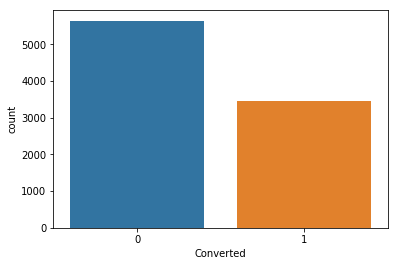

In [27]:
# univariate analysis for the dependent variable

sns.countplot(x=Lead_data_df['Converted'])
plt.show()

<Figure size 1800x1800 with 0 Axes>

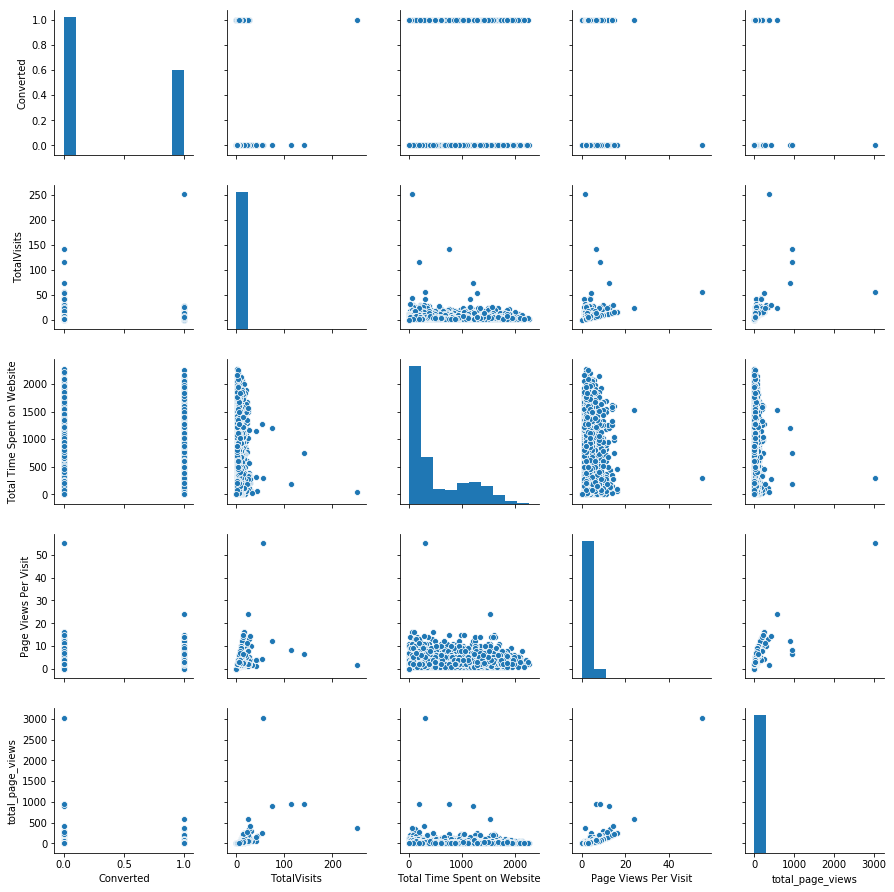

In [28]:
# Analysing relation between numerical variables
plt.figure(figsize=(25,25))
sns.pairplot(Lead_data_df[['Converted', 'TotalVisits','Total Time Spent on Website', 
                           'Page Views Per Visit','total_page_views']])
plt.show()

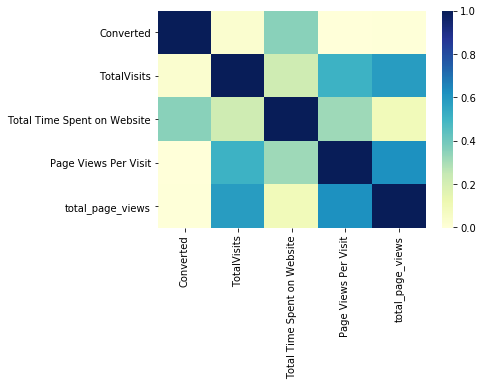

In [29]:
# Checking the correlations
corr = Lead_data_df.corr()
sns.heatmap(corr,cmap="YlGnBu")

#### The relation between numerical variables has been understood from the above pairplot and heatmap

Text(0.5,1,'A free copy of Mastering The Interview versus Count of Converted')

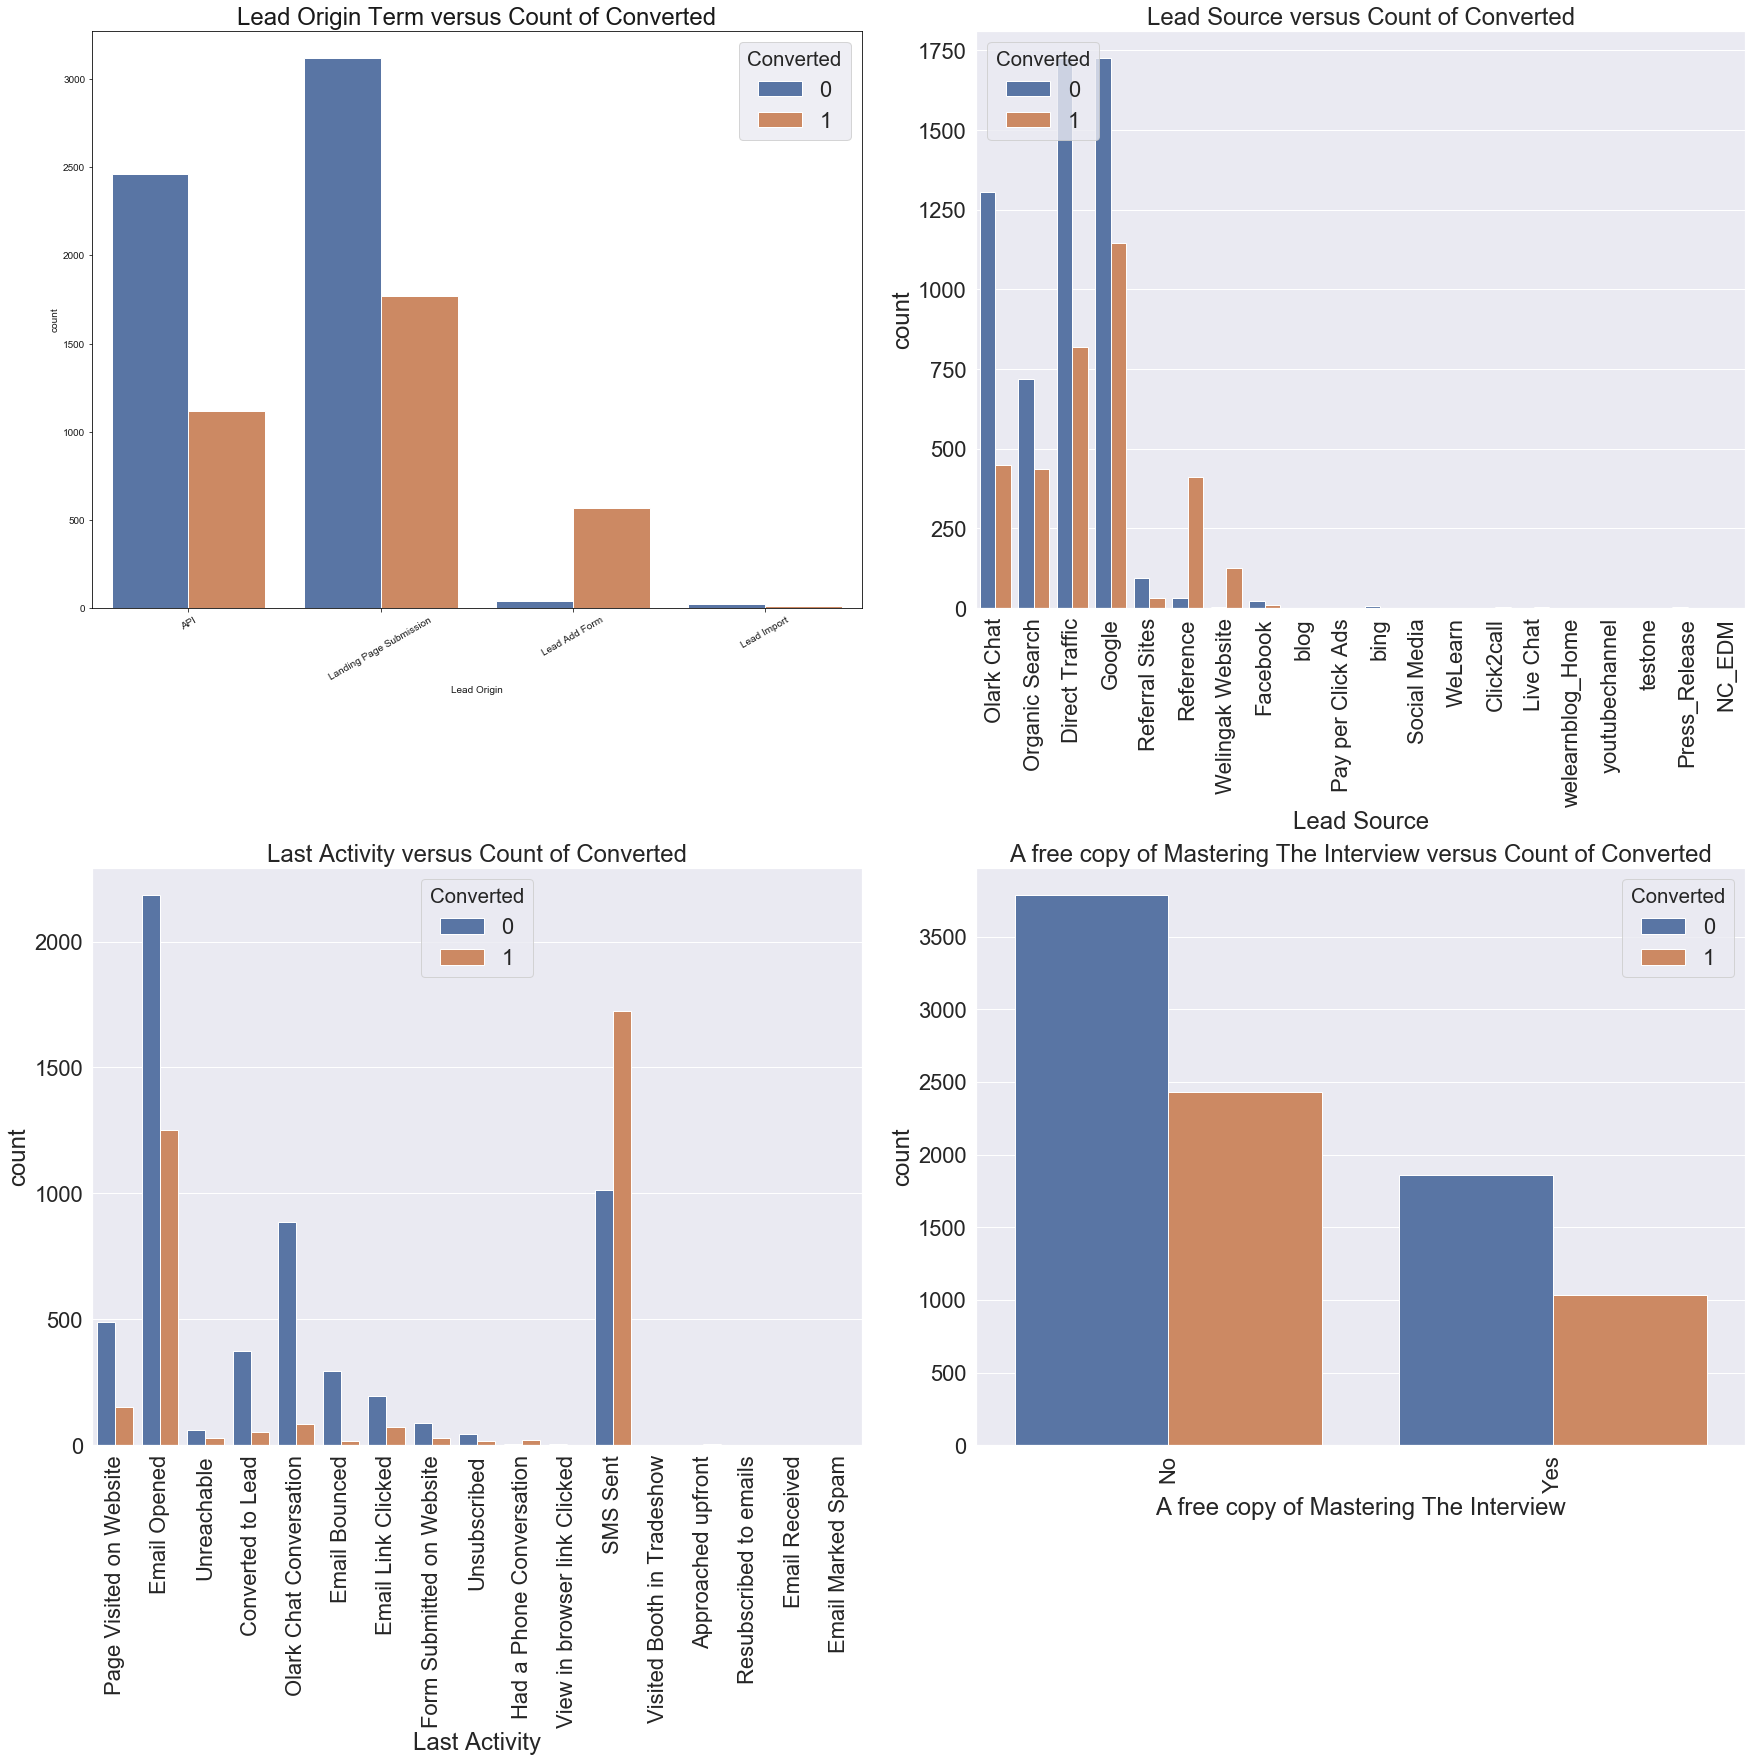

In [30]:
 ####-----------------CATEGORICAL VARIABLE ANALYSIS--------------------------------##

plt.figure(figsize=(25, 25))

plt.subplot(2, 2, 1)
sns.set(font_scale = 2)
plt.xticks(rotation=30)
plt.tight_layout()
sns.countplot(x='Lead Origin', data=Lead_data_df,hue="Converted", palette='deep')
plt.title("Lead Origin Term versus Count of Converted")

plt.subplot(2, 2, 2)
sns.set(font_scale = 2)
plt.xticks(rotation=90)
plt.tight_layout()
sns.countplot(x='Lead Source', data=Lead_data_df,hue="Converted", palette='deep')
plt.title("Lead Source versus Count of Converted")

plt.subplot(2, 2, 3)
sns.set(font_scale = 2)
plt.xticks(rotation=90)
plt.tight_layout()
sns.countplot(x='Last Activity', data=Lead_data_df,hue="Converted", palette='deep')
plt.title("Last Activity versus Count of Converted")

plt.subplot(2, 2, 4)
sns.set(font_scale = 2)
plt.xticks(rotation=90)
plt.tight_layout()
sns.countplot(x='A free copy of Mastering The Interview', data=Lead_data_df,hue="Converted", palette='deep')
plt.title("A free copy of Mastering The Interview versus Count of Converted")

Text(0.5,1,'Specialization versus Count of Converted')

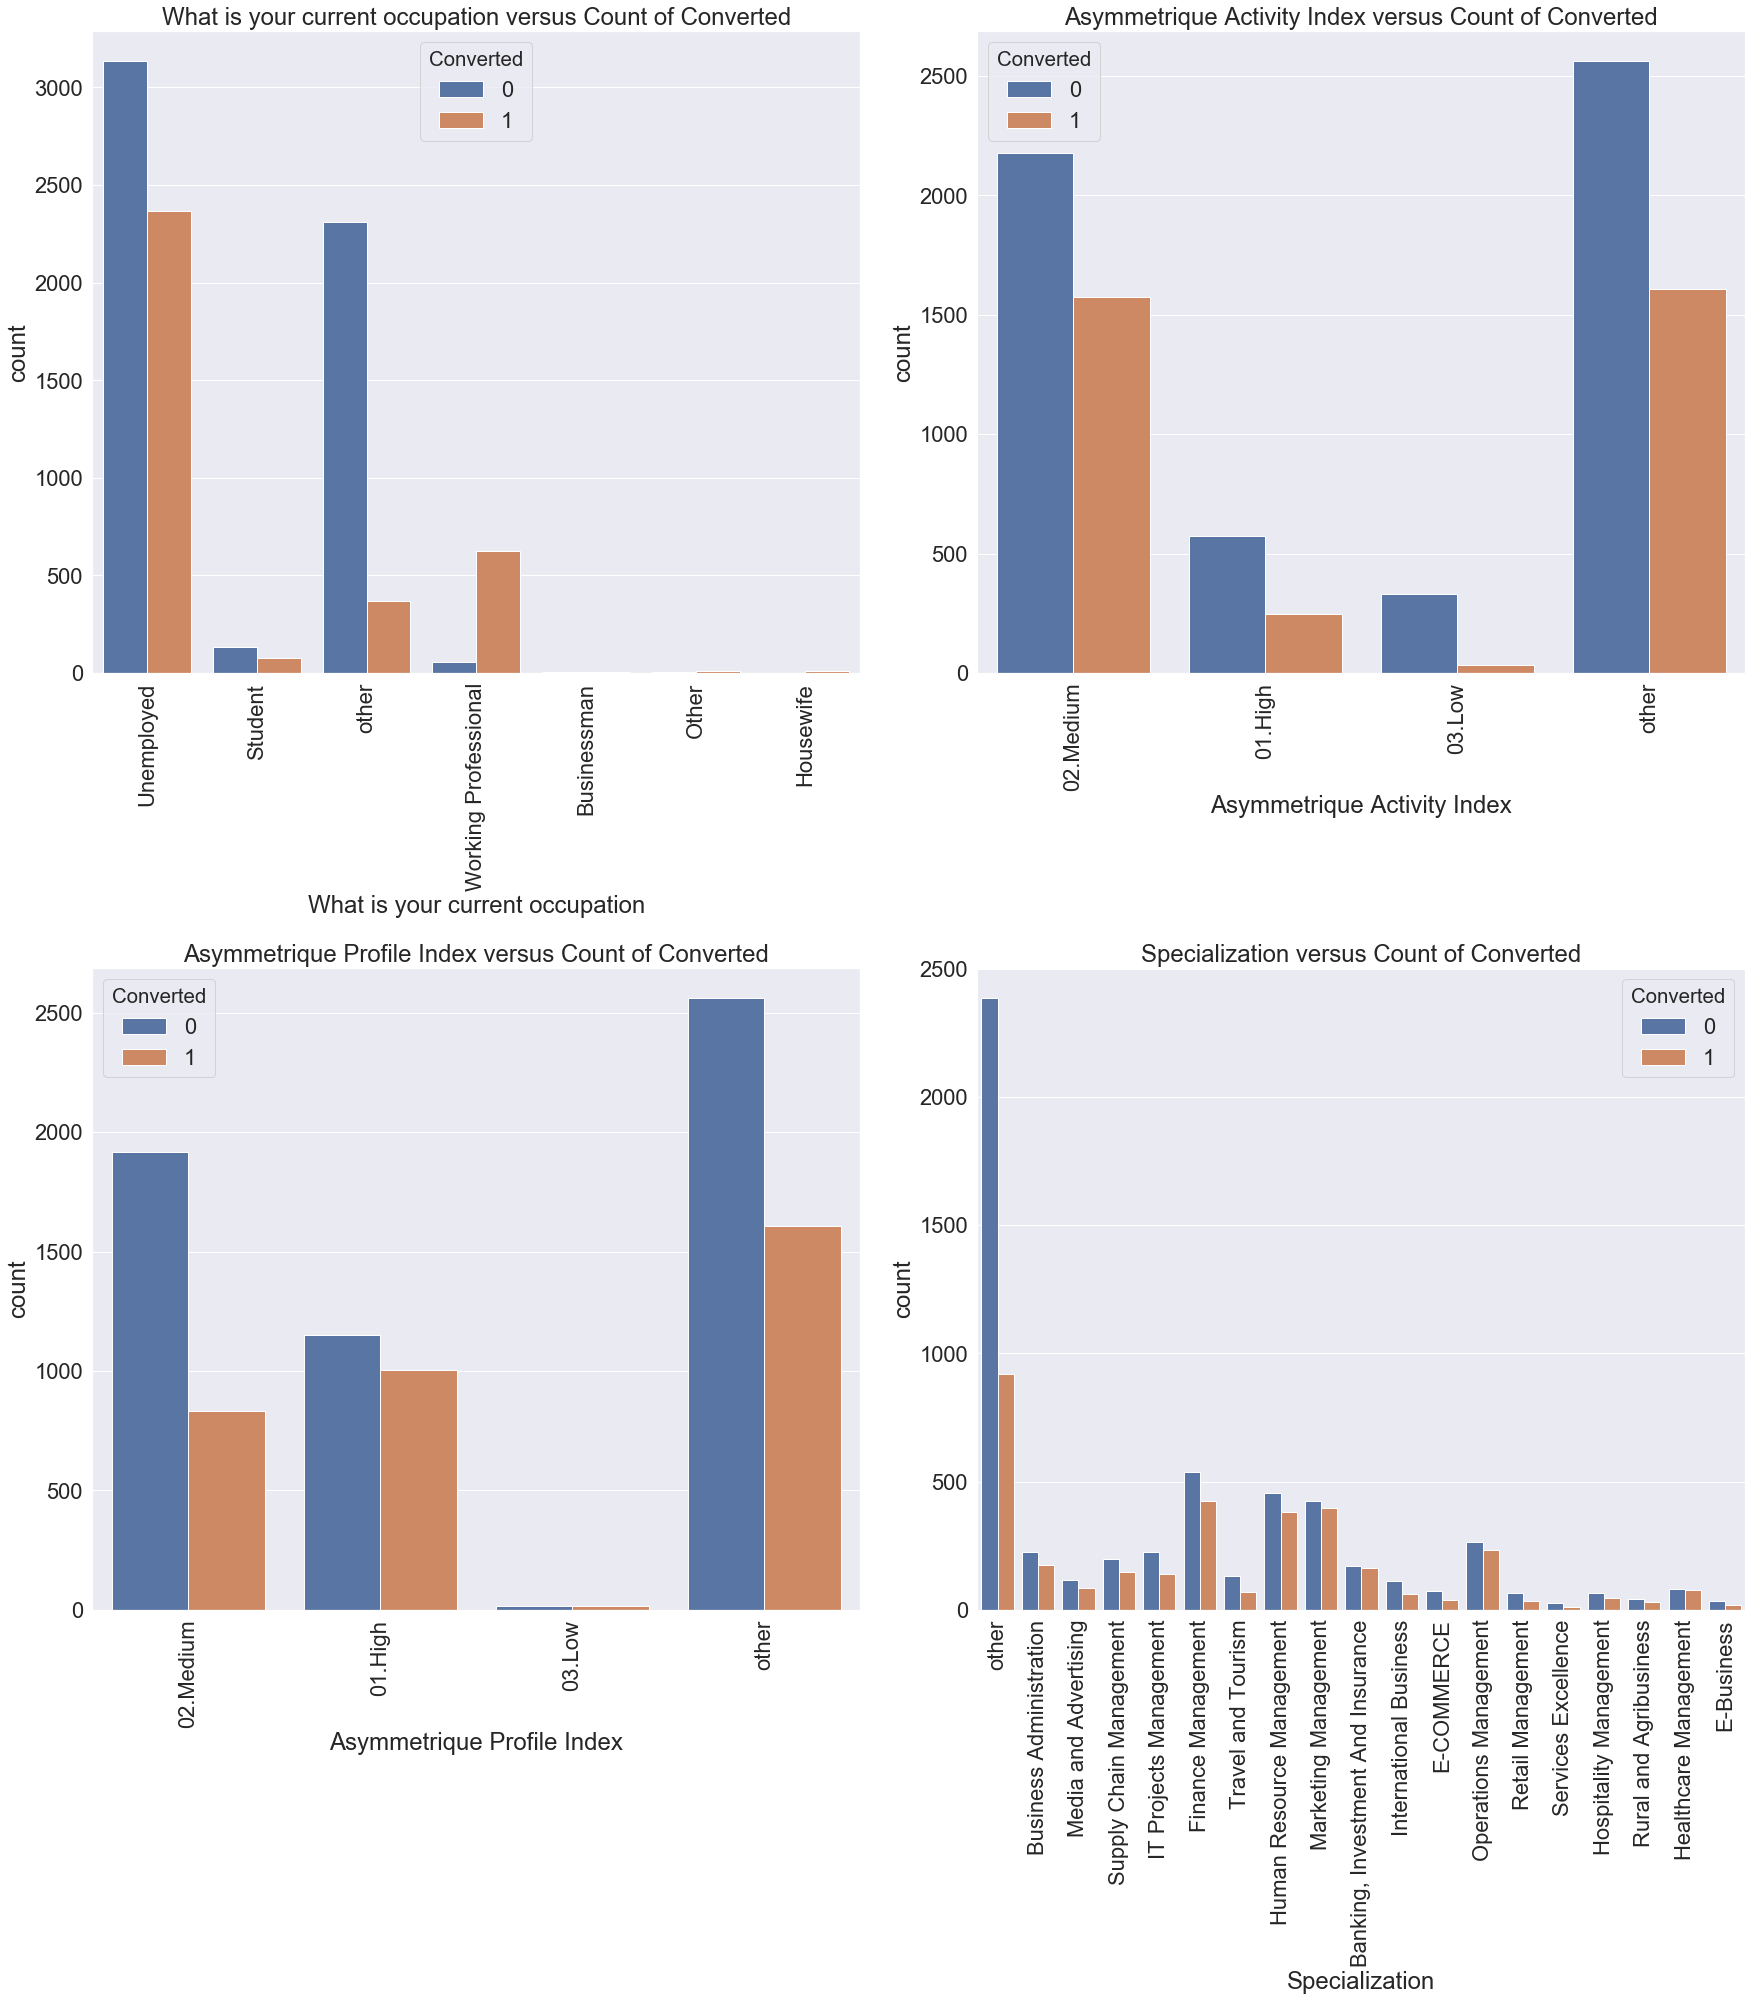

In [31]:
 ####-----------------CATEGORICAL VARIABLE ANALYSIS--------------------------------##
plt.figure(figsize=(25, 25))

plt.subplot(2, 2, 1)
sns.set(font_scale = 2)
plt.xticks(rotation=90)
plt.tight_layout()
sns.countplot(x='What is your current occupation', data=Lead_data_df,hue="Converted", palette='deep')
plt.title("What is your current occupation versus Count of Converted")

plt.subplot(2, 2, 2)
sns.set(font_scale = 2)
plt.xticks(rotation=90)
plt.tight_layout()
sns.countplot(x='Asymmetrique Activity Index', data=Lead_data_df,hue="Converted", palette='deep')
plt.title("Asymmetrique Activity Index versus Count of Converted")

plt.subplot(2, 2, 3)
sns.set(font_scale = 2)
plt.xticks(rotation=90)
plt.tight_layout()
sns.countplot(x='Asymmetrique Profile Index', data=Lead_data_df,hue="Converted", palette='deep')
plt.title("Asymmetrique Profile Index versus Count of Converted")

plt.subplot(2, 2, 4)
sns.set(font_scale = 2)
plt.xticks(rotation=90)
plt.tight_layout()
sns.countplot(x='Specialization', data=Lead_data_df,hue="Converted", palette='deep')
plt.title("Specialization versus Count of Converted")

Text(0.5,1,'Last Notable Activity versus Count of Converted')

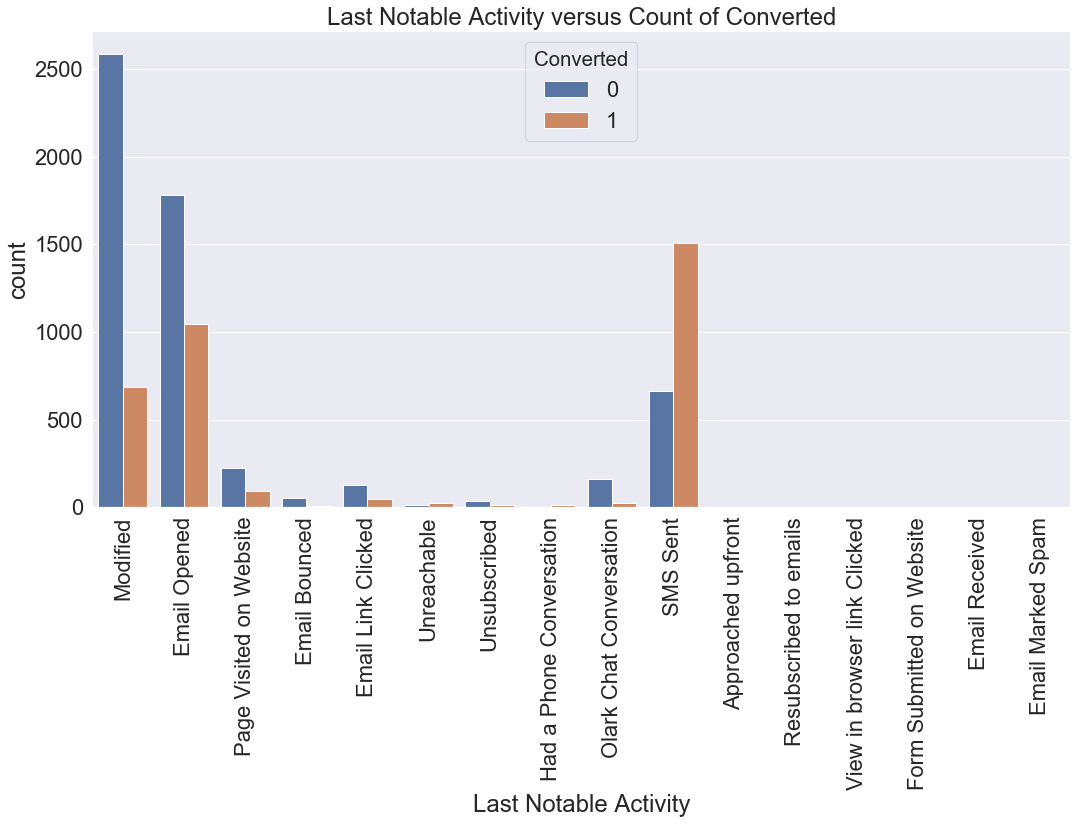

In [32]:
plt.figure(figsize=(15, 8))
sns.set(font_scale = 2)
plt.xticks(rotation=90)
plt.tight_layout()
sns.countplot(x='Last Notable Activity', data=Lead_data_df,hue="Converted", palette='deep')
plt.title("Last Notable Activity versus Count of Converted")

### Multi Variate Analysis 

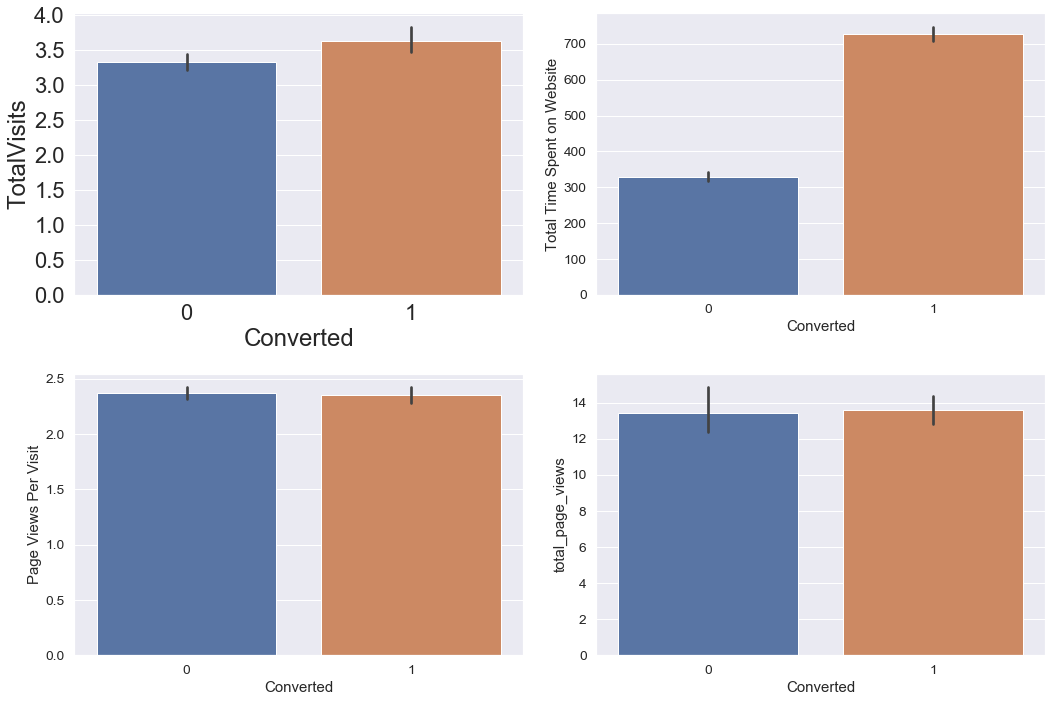

In [33]:
plt.figure(figsize=(15,10))

plt.subplot(2,2,1)
plt.tight_layout()
sns.set(font_scale = 1.25)
sns.barplot(x='Converted',y='TotalVisits',data=Lead_data_df)

plt.subplot(2,2,2)
plt.tight_layout()
sns.set(font_scale = 1.25)
sns.barplot(x='Converted',y='Total Time Spent on Website',data=Lead_data_df)


plt.subplot(2,2,3)
plt.tight_layout()
sns.set(font_scale = 1.25)
sns.barplot(x='Converted',y='Page Views Per Visit',data=Lead_data_df)

plt.subplot(2,2,4)
plt.tight_layout()
sns.set(font_scale = 1.25)
sns.barplot(x='Converted',y='total_page_views',data=Lead_data_df)

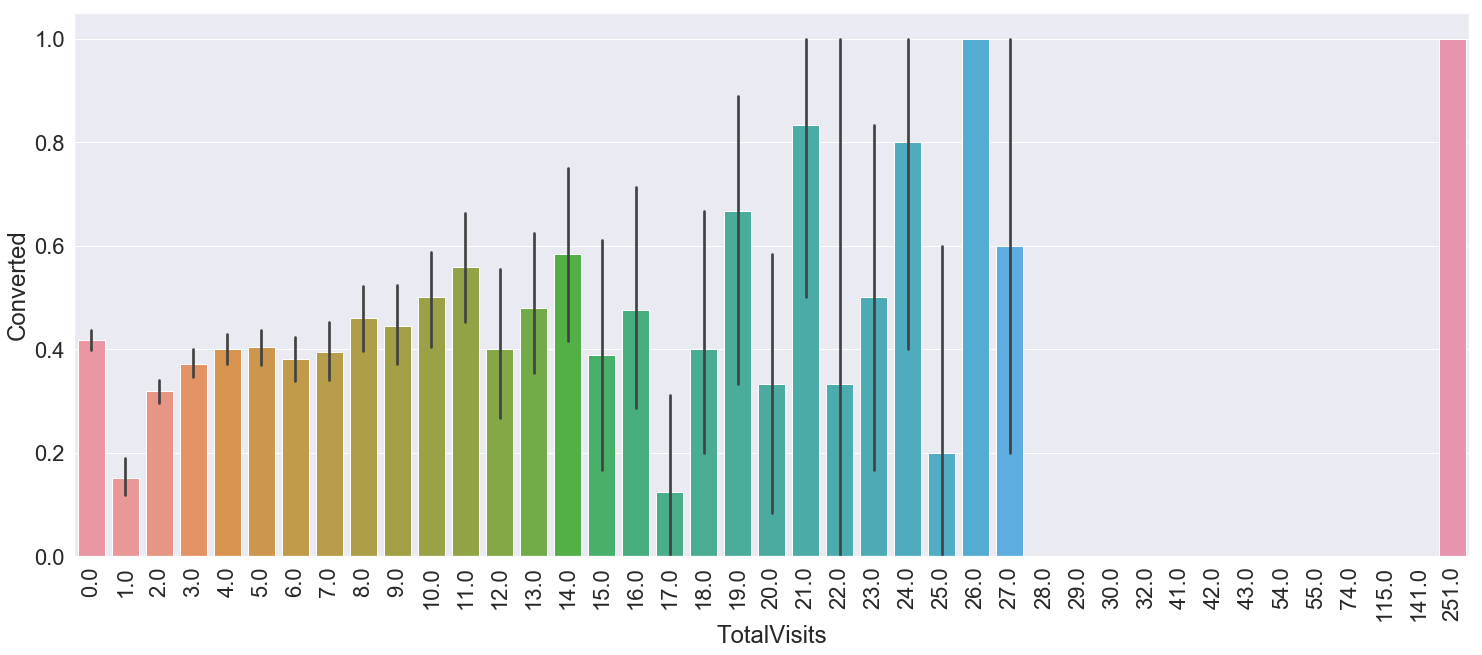

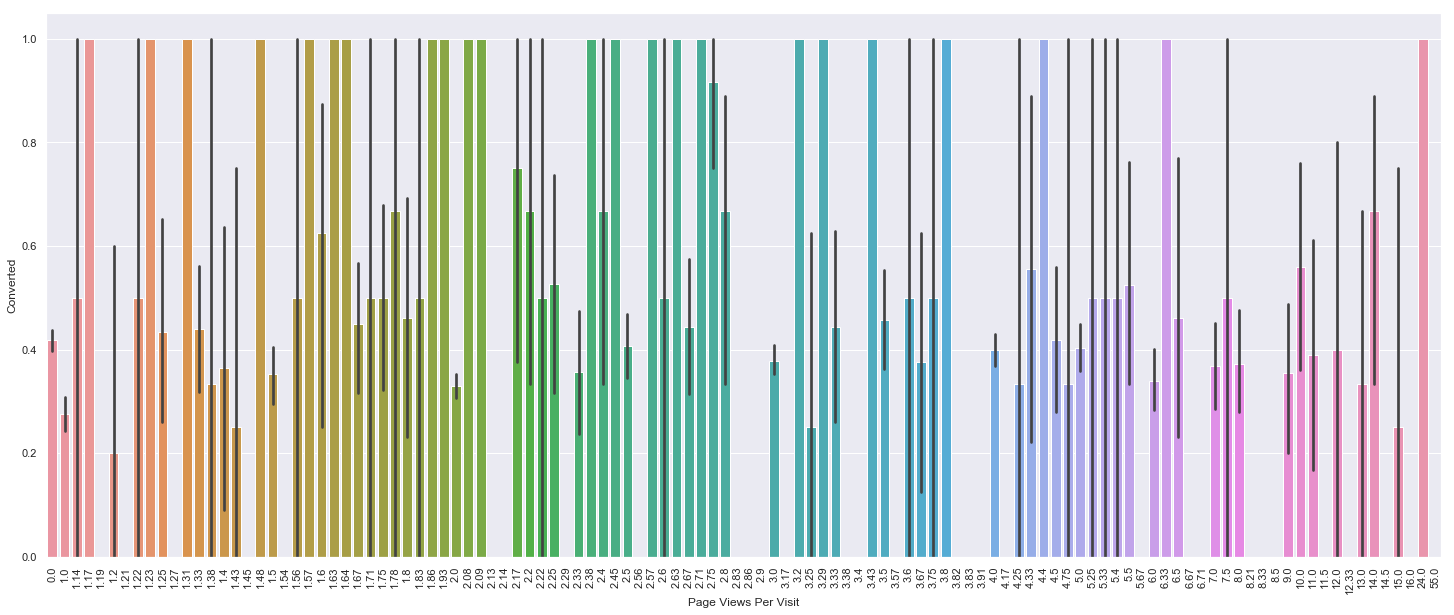

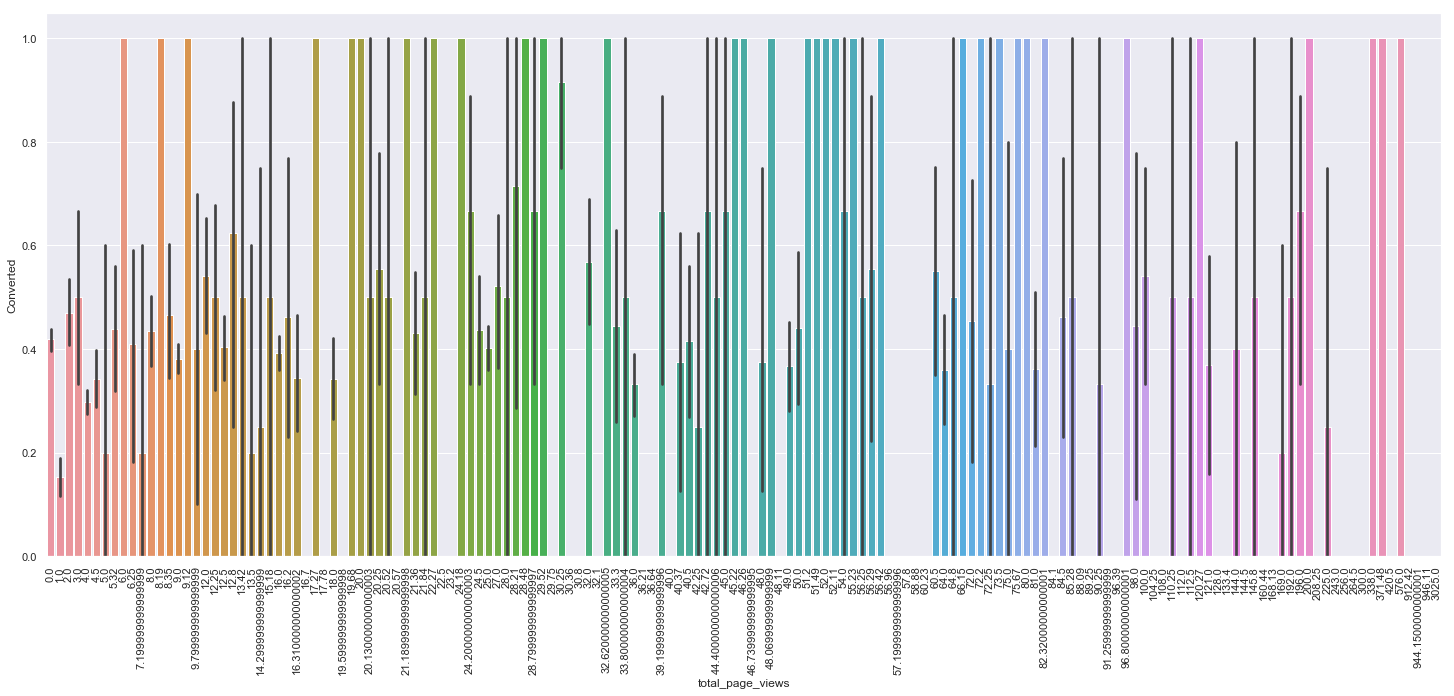

In [34]:
plt.figure(figsize=(25,10))
sns.set(font_scale = 2)
plt.xticks(rotation=90)
sns.barplot(x='TotalVisits',y='Converted',data=Lead_data_df)

plt.figure(figsize=(25,10))
sns.set(font_scale = 1)
plt.xticks(rotation=90)
sns.barplot(x='Page Views Per Visit',y='Converted',data=Lead_data_df)

plt.figure(figsize=(25,10))
sns.set(font_scale = 1)
plt.xticks(rotation=90)
sns.barplot(x='total_page_views',y='Converted',data=Lead_data_df)

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

<Figure size 1080x720 with 0 Axes>

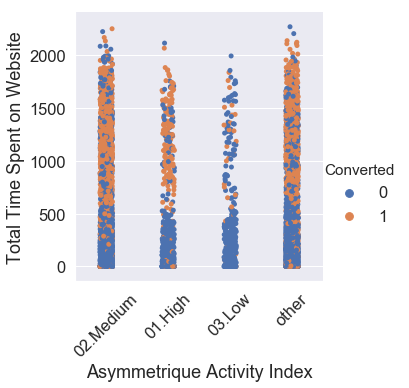

In [35]:
plt.figure(figsize=(15,10))
sns.set(font_scale = 1.5)
sns.catplot(x="Asymmetrique Activity Index", y="Total Time Spent on Website", hue="Converted", data=Lead_data_df)
plt.xticks(rotation=45)

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

<Figure size 1080x720 with 0 Axes>

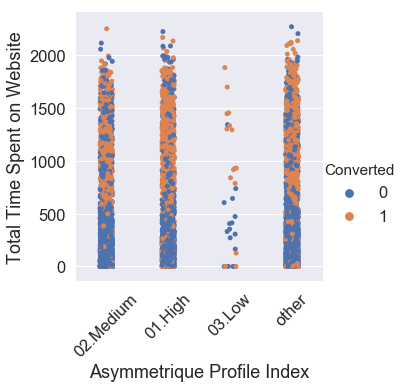

In [36]:
plt.figure(figsize=(15,10))
sns.set(font_scale = 1.5)
sns.catplot(x="Asymmetrique Profile Index", y="Total Time Spent on Website", hue="Converted", data=Lead_data_df)
plt.xticks(rotation=45)

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

<Figure size 1080x720 with 0 Axes>

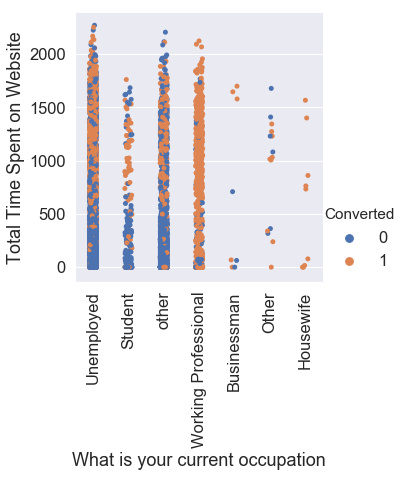

In [37]:
plt.figure(figsize=(15,10))
sns.set(font_scale = 1.5)
sns.catplot(x="What is your current occupation", y="Total Time Spent on Website", hue="Converted", data=Lead_data_df)
plt.xticks(rotation=90)

#### Note: The column other is treated later

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text xticklabel objects>)

<Figure size 1440x1440 with 0 Axes>

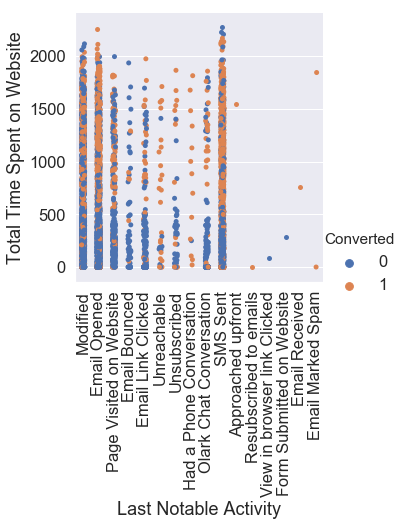

In [38]:
plt.figure(figsize=(20,20))
sns.set(font_scale = 1.5)
sns.catplot(x="Last Notable Activity", y="Total Time Spent on Website", hue="Converted", data=Lead_data_df)
plt.xticks(rotation=90)

#### From these plots we have understood the data and the hidden patterns better 


## 3.  Outlier treatment

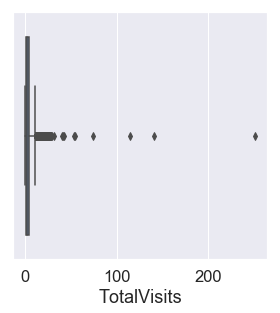

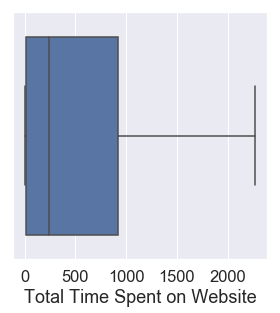

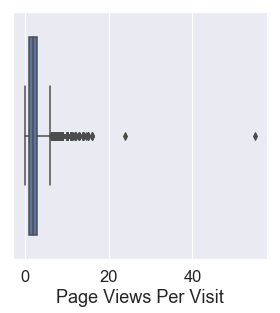

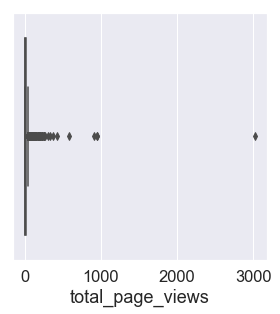

In [39]:
# Analyze the boxplot for columns 'TotalVisits','Total Time Spent on Website','Page Views Per Visit' , 'total_page_views'

outlier = ['TotalVisits','Total Time Spent on Website','Page Views Per Visit' , 'total_page_views']


for i in outlier:
   # for j in range(0,len(car_df[car_df_num])):
        plt.figure(figsize=(10,10))
        plt.subplot(2,2,1)
        sns.boxplot(Lead_data_df[i])
        plt.show()

In [40]:
# Remove the outliers for the columns 'TotalVisits' and 'Page views per visit'

Q1 = Lead_data_df['TotalVisits'].quantile(0.25)
Q3 = Lead_data_df['TotalVisits'].quantile(0.75)
IQR = Q3 - Q1

Lead_data_df = Lead_data_df[(Lead_data_df['TotalVisits'] >= Q1-IQR*1.5 ) & (Lead_data_df['TotalVisits'] <= Q3 + IQR*1.5)]

Q1 = Lead_data_df['Page Views Per Visit'].quantile(0.25)
Q3 = Lead_data_df['Page Views Per Visit'].quantile(0.75)
IQR = Q3 - Q1

Lead_data_df = Lead_data_df[(Lead_data_df['Page Views Per Visit'] >= Q1-IQR*1.5 ) & (Lead_data_df['Page Views Per Visit'] <= Q3 + IQR*1.5)]



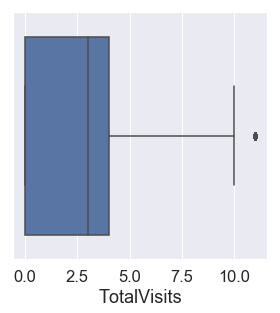

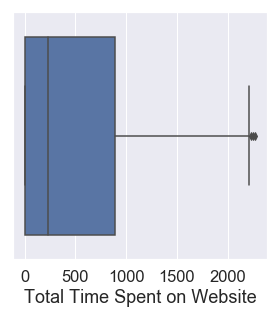

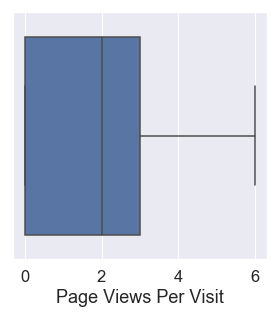

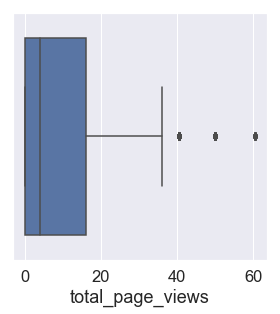

In [41]:
# Analyze the boxplot for columns 'TotalVisits','Total Time Spent on Website','Page Views Per Visit' , 'total_page_views'

outlier = ['TotalVisits','Total Time Spent on Website','Page Views Per Visit' , 'total_page_views']


for i in outlier:
   # for j in range(0,len(car_df[car_df_num])):
        plt.figure(figsize=(10,10))
        plt.subplot(2,2,1)
        sns.boxplot(Lead_data_df[i])
        plt.show()

## 4. Create Dummy data / binary data

In [42]:
# Transform the binary data for the column 'A free copy of Mastering The Interview'

Lead_data_df['A free copy of Mastering The Interview'] = Lead_data_df['A free copy of Mastering The Interview'].map({'Yes':1,'No':0})

In [43]:
Lead_data_df.head()

,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Asymmetrique Activity Index,Asymmetrique Profile Index,A free copy of Mastering The Interview,Last Notable Activity,total_page_views
0,API,Olark Chat,0,0.0,0,0.0,Page Visited on Website,other,Unemployed,02.Medium,02.Medium,0,Modified,0.0
1,API,Organic Search,0,5.0,674,2.5,Email Opened,other,Unemployed,02.Medium,02.Medium,0,Email Opened,12.5
2,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Email Opened,Business Administration,Student,02.Medium,01.High,1,Email Opened,4.0
3,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,02.Medium,01.High,0,Modified,1.0
4,Landing Page Submission,Google,1,2.0,1428,1.0,Converted to Lead,other,Unemployed,02.Medium,01.High,0,Modified,2.0


In [44]:
# Segregating numerical and categorical variables

num_vars = ['Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit',
       'total_page_views', 'A free copy of Mastering The Interview']

cat_vars  = [
    'Lead Origin', 
    'Lead Source', 
    'Last Activity',
    'What is your current occupation','Specialization','What is your current occupation',
   # 'Tags',
    #'Lead Quality',
    #'Lead Profile',
    #'City',
    'Specialization',
    #'Asymmetrique Activity Score',
    #'Asymmetrique Profile Score', 
    'Asymmetrique Activity Index', 
    'Asymmetrique Profile Index', 
    'Last Notable Activity']

In [45]:
# Review distinct values for each column in categorical variable list for dummy variable transformation

for e in cat_vars:
    print('--'*30)
    print(e)
    print('--'*30)
    print(Lead_data_df[e].value_counts())

------------------------------------------------------------
Lead Origin
------------------------------------------------------------
Landing Page Submission    4453
API                        3456
Lead Add Form               603
Lead Import                  30
Name: Lead Origin, dtype: int64
------------------------------------------------------------
Lead Source
------------------------------------------------------------
Google               2737
Direct Traffic       2368
Olark Chat           1746
Organic Search        937
Reference             440
Welingak Website      128
Referral Sites        106
Facebook               30
bing                    6
Click2call              3
Live Chat               2
Social Media            2
testone                 1
youtubechannel          1
welearnblog_Home        1
Pay per Click Ads       1
Press_Release           1
blog                    1
WeLearn                 1
NC_EDM                  1
Name: Lead Source, dtype: int64
--------------------

In [46]:
Lead_data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8542 entries, 0 to 9239
Data columns (total 14 columns):
Lead Origin                               8542 non-null object
Lead Source                               8513 non-null object
Converted                                 8542 non-null int64
TotalVisits                               8542 non-null float64
Total Time Spent on Website               8542 non-null int64
Page Views Per Visit                      8542 non-null float64
Last Activity                             8542 non-null object
Specialization                            8542 non-null object
What is your current occupation           8542 non-null object
Asymmetrique Activity Index               8542 non-null object
Asymmetrique Profile Index                8542 non-null object
A free copy of Mastering The Interview    8542 non-null int64
Last Notable Activity                     8542 non-null object
total_page_views                          8542 non-null float64
dtypes: flo

In [47]:
# Create dummy variables for categorical variables 

Lead_Origin_df = pd.get_dummies(data=Lead_data_df['Lead Origin'],prefix='Lead_Origin',drop_first=True)
Lead_Origin_df = Lead_Origin_df.reset_index()


Lead_Source_df = pd.get_dummies(data=Lead_data_df['Lead Source'],prefix='Lead_Source',drop_first=True)
Lead_Source_df = Lead_Source_df.reset_index()


Last_Activity_df = pd.get_dummies(data=Lead_data_df['Last Activity'],prefix='Last_Activity',drop_first=True)
Last_Activity_df = Last_Activity_df.reset_index()



Last_Notable_Activity_df = pd.get_dummies(data=Lead_data_df['Last Notable Activity'],prefix='Last_Notable_Activity',drop_first=True)
Last_Notable_Activity_df = Last_Notable_Activity_df.reset_index()



Specialization_df = pd.get_dummies(data=Lead_data_df['Specialization'],prefix='Specialization',drop_first=False)
Specialization_df = Specialization_df.reset_index()
Specialization_df.drop(columns='Specialization_other',inplace=True)   # Drop other column



current_occupation_df = pd.get_dummies(data=Lead_data_df['What is your current occupation'],prefix='current_occupation',drop_first=False)
current_occupation_df = current_occupation_df.reset_index()
current_occupation_df.drop(columns='current_occupation_other',inplace=True) # Drop other column



Asymmetrique_Activity_Index_df = pd.get_dummies(data=Lead_data_df['Asymmetrique Activity Index'],prefix='Asymmetrique_Activity_Index',drop_first=False)
Asymmetrique_Activity_Index_df = Asymmetrique_Activity_Index_df.reset_index()
Asymmetrique_Activity_Index_df.drop(columns='Asymmetrique_Activity_Index_other',inplace=True) # Drop other column


Asymmetrique_Profile_Index_df = pd.get_dummies(data=Lead_data_df['Asymmetrique Profile Index'],prefix='Asymmetrique_Profile_Index',drop_first=False)
Asymmetrique_Profile_Index_df = Asymmetrique_Profile_Index_df.reset_index()
Asymmetrique_Profile_Index_df.drop(columns='Asymmetrique_Profile_Index_other',inplace=True) # Drop other column






In [48]:
# Create the final list of dataframes with all the dataframes


df_list = [Lead_Origin_df,
           Lead_Source_df,
           Last_Activity_df,
           Last_Notable_Activity_df,
           Specialization_df,
           current_occupation_df,
           Asymmetrique_Activity_Index_df,
           Asymmetrique_Profile_Index_df,
          ]

from functools import reduce
Lead_data_dummy = reduce(lambda left,right: pd.merge(left,right,on='index',how='inner'), df_list )

In [49]:
# Finally merge the dataframe 'Lead_data_dummy' with original dataframe 'Lead_data_df'

Lead_data_df = Lead_data_df.reset_index()
Lead_data_df = pd.merge(Lead_data_dummy,Lead_data_df,on='index',how='inner')

In [50]:
# Remove the original columns for dummy variables 

Lead_data_df.drop(columns=cat_vars,inplace=True)
Lead_data_df.drop(columns='index',inplace=True)

In [51]:
# Review the final column list 
Lead_data_df.columns.tolist()

['Lead_Origin_Landing Page Submission',
 'Lead_Origin_Lead Add Form',
 'Lead_Origin_Lead Import',
 'Lead_Source_Direct Traffic',
 'Lead_Source_Facebook',
 'Lead_Source_Google',
 'Lead_Source_Live Chat',
 'Lead_Source_NC_EDM',
 'Lead_Source_Olark Chat',
 'Lead_Source_Organic Search',
 'Lead_Source_Pay per Click Ads',
 'Lead_Source_Press_Release',
 'Lead_Source_Reference',
 'Lead_Source_Referral Sites',
 'Lead_Source_Social Media',
 'Lead_Source_WeLearn',
 'Lead_Source_Welingak Website',
 'Lead_Source_bing',
 'Lead_Source_blog',
 'Lead_Source_testone',
 'Lead_Source_welearnblog_Home',
 'Lead_Source_youtubechannel',
 'Last_Activity_Converted to Lead',
 'Last_Activity_Email Bounced',
 'Last_Activity_Email Link Clicked',
 'Last_Activity_Email Marked Spam',
 'Last_Activity_Email Opened',
 'Last_Activity_Email Received',
 'Last_Activity_Form Submitted on Website',
 'Last_Activity_Had a Phone Conversation',
 'Last_Activity_Olark Chat Conversation',
 'Last_Activity_Page Visited on Website',
 'L

## 5. Test-train split of the data

In [52]:
from sklearn.model_selection import train_test_split
df_train,df_test = train_test_split(Lead_data_df, train_size=0.7, test_size=0.3, random_state=100)

In [53]:
y_train = df_train.pop('Converted')
X_train = df_train

In [54]:
X_train.head()

,Lead_Origin_Landing Page Submission,Lead_Origin_Lead Add Form,Lead_Origin_Lead Import,Lead_Source_Direct Traffic,Lead_Source_Facebook,Lead_Source_Google,Lead_Source_Live Chat,Lead_Source_NC_EDM,Lead_Source_Olark Chat,Lead_Source_Organic Search,...,Asymmetrique_Activity_Index_02.Medium,Asymmetrique_Activity_Index_03.Low,Asymmetrique_Profile_Index_01.High,Asymmetrique_Profile_Index_02.Medium,Asymmetrique_Profile_Index_03.Low,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,total_page_views
1234,1,0,0,0,0,1,0,0,0,0,...,1,0,1,0,0,5.0,286,5.0,0,25.0
1824,0,1,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0.0,0,0.0,0,0.0
3219,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0.0,0,0.0,0,0.0
5472,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,4.0,635,4.0,0,16.0
1257,1,0,0,1,0,0,0,0,0,0,...,0,1,0,1,0,2.0,2,2.0,1,4.0


## 5. standardization of the scales of  variables

In [55]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train[['TotalVisits',"Total Time Spent on Website",'Page Views Per Visit','total_page_views']] = scaler.fit_transform(X_train[['TotalVisits',"Total Time Spent on Website",'Page Views Per Visit','total_page_views']])

C:\Users\pseesala\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\pseesala\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


## 6.Model Building

In [56]:
import statsmodels.api as sm

# Logistic regression model with rfe
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

C:\Users\pseesala\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:880: RuntimeWarning: invalid value encountered in true_divide
  n_endog_mu = self._clean((1. - endog) / (1. - mu))
C:\Users\pseesala\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:880: RuntimeWarning: divide by zero encountered in true_divide
  n_endog_mu = self._clean((1. - endog) / (1. - mu))
C:\Users\pseesala\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:879: RuntimeWarning: divide by zero encountered in true_divide
  endog_mu = self._clean(endog / mu)
C:\Users\pseesala\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:879: RuntimeWarning: invalid value encountered in true_divide
  endog_mu = self._clean(endog / mu)
C:\Users\pseesala\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:932: RuntimeWarning: divide by

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5979
Model:                            GLM   Df Residuals:                     5897
Model Family:                Binomial   Df Model:                           81
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Sun, 03 Mar 2019   Deviance:                          nan
Time:                        23:26:49   Pearson chi2:                 5.85e+18
No. Iterations:                   100   Covariance Type:             nonrobust
======================================================================================================================
                                                         coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------
const                                               3.903e+15   8.37e+07   4.66e+07      0.000     3.9e+15     3.9e+15
Lead_Origin_Landing Page Submission                 2.131e+14   3.79e+06   5.62e+07      0.000    2.13e+14    2.13e+14
Lead_Origin_Lead Add Form                           5.822e+14   4.77e+07   1.22e+07      0.000    5.82e+14    5.82e+14
Lead_Origin_Lead Import                            -4.736e+14   8.36e+07  -5.66e+06      0.000   -4.74e+14   -4.74e+14
Lead_Source_Direct Traffic                         -9.983e+14   4.98e+07     -2e+07      0.000   -9.98e+14   -9.98e+14
Lead_Source_Facebook                               -9.899e+14   6.89e+07  -1.44e+07      0.000    -9.9e+14    -9.9e+14
Lead_Source_Google                                  -9.49e+14   4.98e+07  -1.91e+07      0.000   -9.49e+14   -9.49e+14
Lead_Source_Live Chat                               3.974e+15   4.97e+07      8e+07      0.000    3.97e+15    3.97e+15
Lead_Source_NC_EDM                                 -1.779e+15   8.38e+07  -2.12e+07      0.000   -1.78e+15   -1.78e+15
Lead_Source_Olark Chat                             -9.399e+14   4.98e+07  -1.89e+07      0.000    -9.4e+14    -9.4e+14
Lead_Source_Organic Search                         -7.995e+14   4.98e+07   -1.6e+07      0.000   -7.99e+14   -7.99e+14
Lead_Source_Pay per Click Ads                      -4.794e+15   8.37e+07  -5.73e+07      0.000   -4.79e+15   -4.79e+15
Lead_Source_Press_Release                          -4.112e+14    8.4e+07  -4.89e+06      0.000   -4.11e+14   -4.11e+14
Lead_Source_Reference                               1.892e+14   1.49e+07   1.27e+07      0.000    1.89e+14    1.89e+14
Lead_Source_Referral Sites                         -1.219e+15   5.04e+07  -2.42e+07      0.000   -1.22e+15   -1.22e+15
Lead_Source_Social Media                           -1.243e+15   8.39e+07  -1.48e+07      0.000   -1.24e+15   -1.24e+15
Lead_Source_WeLearn                                 2.413e+15   8.37e+07   2.88e+07      0.000    2.41e+15    2.41e+15
Lead_Source_Welingak Website                        4.038e+14    1.6e+07   2.52e+07      0.000    4.04e+14    4.04e+14
Lead_Source_bing                                   -9.247e+14   5.82e+07  -1.59e+07      0.000   -9.25e+14   -9.25e+14
Lead_Source_blog                                   -9.296e+14   8.37e+07  -1.11e+07      0.000    -9.3e+14    -9.3e+14
Lead_Source_testone                                -5.181e+15   8.37e+07  -6.19e+07      0.000   -5.18e+15   -5.18e+15
Lead_Source_welearnblog_Home                       -5.159e+15   8.37e+07  -6.16e+07      0.000   -5.16e+15   -5.16e+15
Lead_Source_youtubechannel                            -7.8284   1.12e-06  -6.99e+06      0.000      -7.828      -7.828
Last_Activity_Converted to Lead                    -3.085e+15   3.91

In [57]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [58]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 20)             # running RFE with 13 variables as output
rfe = rfe.fit(X_train, y_train)

<B> Running RFE with top 20 variables </B>

In [59]:
rfe.support_

array([False,  True, False,  True, False,  True, False, False, False,
        True, False, False, False,  True, False, False,  True, False,
       False, False, False, False,  True,  True, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False, False,  True, False,  True, False, False, False,
        True,  True,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False,  True,  True,  True, False, False,  True, False,
       False, False, False,  True, False, False, False])

In [60]:
col = X_train.columns[rfe.support_]

In [61]:
col

Index(['Lead_Origin_Lead Add Form', 'Lead_Source_Direct Traffic',
       'Lead_Source_Google', 'Lead_Source_Organic Search',
       'Lead_Source_Referral Sites', 'Lead_Source_Welingak Website',
       'Last_Activity_Converted to Lead', 'Last_Activity_Email Bounced',
       'Last_Activity_Olark Chat Conversation',
       'Last_Notable_Activity_Email Link Clicked',
       'Last_Notable_Activity_Email Opened', 'Last_Notable_Activity_Modified',
       'Last_Notable_Activity_Olark Chat Conversation',
       'Last_Notable_Activity_Page Visited on Website',
       'current_occupation_Housewife', 'current_occupation_Student',
       'current_occupation_Unemployed',
       'current_occupation_Working Professional',
       'Asymmetrique_Activity_Index_03.Low', 'Total Time Spent on Website'],
      dtype='object')

In [62]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5979
Model:                            GLM   Df Residuals:                     5958
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2361.3
Date:                Sun, 03 Mar 2019   Deviance:                       4722.6
Time:                        23:26:51   Pearson chi2:                 5.99e+03
No. Iterations:                    20   Covariance Type:             nonrobust
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                             0.4930      0.125      3.937      0.000       0.248       0.738
Lead_Origin_Lead Add Form                         2.3491      0.235     10.003      0.000       1.889       2.809
Lead_Source_Direct Traffic                       -1.6013      0.122    -13.157      0.000      -1.840      -1.363
Lead_Source_Google                               -1.1673      0.116    -10.030      0.000      -1.395      -0.939
Lead_Source_Organic Search                       -1.2972      0.145     -8.919      0.000      -1.582      -1.012
Lead_Source_Referral Sites                       -1.3016      0.384     -3.393      0.001      -2.053      -0.550
Lead_Source_Welingak Website                      2.3915      1.034      2.312      0.021       0.364       4.419
Last_Activity_Converted to Lead                  -1.1840      0.231     -5.118      0.000      -1.637      -0.731
Last_Activity_Email Bounced                      -2.7448      0.413     -6.652      0.000      -3.554      -1.936
Last_Activity_Olark Chat Conversation            -1.5407      0.206     -7.491      0.000      -1.944      -1.138
Last_Notable_Activity_Email Link Clicked         -1.9615      0.291     -6.752      0.000      -2.531      -1.392
Last_Notable_Activity_Email Opened               -1.3003      0.092    -14.206      0.000      -1.480      -1.121
Last_Notable_Activity_Modified                   -1.4646      0.105    -13.949      0.000      -1.670      -1.259
Last_Notable_Activity_Olark Chat Conversation    -1.2946      0.408     -3.173      0.002      -2.094      -0.495
Last_Notable_Activity_Page Visited on Website    -1.6942      0.225     -7.545      0.000      -2.134      -1.254
current_occupation_Housewife                     23.2212    1.4e+04      0.002      0.999   -2.75e+04    2.76e+04
current_occupation_Student                        1.2319      0.260      4.738      0.000       0.722       1.741
current_occupation_Unemployed                     1.1984      0.091     13.181      0.000       1.020       1.377
current_occupation_Working Professional           3.7210      0.208     17.880      0.000       3.313       4.129
Asymmetrique_Activity_Index_03.Low               -1.7717      0.269     -6.585      0.000      -2.299      -1.244
Total Time Spent on Website                       1.1098      0.043     25.890      0.000       1.026       1.194
=================================================================================================================
"""

In [63]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,Last_Notable_Activity_Modified,2.74
16,current_occupation_Unemployed,2.68
2,Lead_Source_Google,2.32
1,Lead_Source_Direct Traffic,2.18
8,Last_Activity_Olark Chat Conversation,1.91
10,Last_Notable_Activity_Email Opened,1.79
0,Lead_Origin_Lead Add Form,1.71
3,Lead_Source_Organic Search,1.46
12,Last_Notable_Activity_Olark Chat Conversation,1.37
17,current_occupation_Working Professional,1.31


#### Dropping column 'current_occupation_Housewife' as it has high probability

In [64]:
col = col.drop(['current_occupation_Housewife'],1)

In [65]:
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5979
Model:                            GLM   Df Residuals:                     5959
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2365.7
Date:                Sun, 03 Mar 2019   Deviance:                       4731.5
Time:                        23:26:52   Pearson chi2:                 6.00e+03
No. Iterations:                     7   Covariance Type:             nonrobust
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                             0.4984      0.125      3.986      0.000       0.253       0.743
Lead_Origin_Lead Add Form                         2.3531      0.235     10.021      0.000       1.893       2.813
Lead_Source_Direct Traffic                       -1.5987      0.122    -13.147      0.000      -1.837      -1.360
Lead_Source_Google                               -1.1638      0.116    -10.010      0.000      -1.392      -0.936
Lead_Source_Organic Search                       -1.2778      0.145     -8.809      0.000      -1.562      -0.993
Lead_Source_Referral Sites                       -1.2996      0.383     -3.390      0.001      -2.051      -0.548
Lead_Source_Welingak Website                      2.3921      1.034      2.313      0.021       0.365       4.419
Last_Activity_Converted to Lead                  -1.1852      0.231     -5.125      0.000      -1.638      -0.732
Last_Activity_Email Bounced                      -2.7446      0.412     -6.655      0.000      -3.553      -1.936
Last_Activity_Olark Chat Conversation            -1.5391      0.206     -7.486      0.000      -1.942      -1.136
Last_Notable_Activity_Email Link Clicked         -1.9606      0.290     -6.750      0.000      -2.530      -1.391
Last_Notable_Activity_Email Opened               -1.2928      0.091    -14.143      0.000      -1.472      -1.114
Last_Notable_Activity_Modified                   -1.4647      0.105    -13.957      0.000      -1.670      -1.259
Last_Notable_Activity_Olark Chat Conversation    -1.2960      0.408     -3.178      0.001      -2.095      -0.497
Last_Notable_Activity_Page Visited on Website    -1.6940      0.224     -7.548      0.000      -2.134      -1.254
current_occupation_Student                        1.2191      0.260      4.689      0.000       0.710       1.729
current_occupation_Unemployed                     1.1858      0.091     13.086      0.000       1.008       1.363
current_occupation_Working Professional           3.7080      0.208     17.830      0.000       3.300       4.116
Asymmetrique_Activity_Index_03.Low               -1.7732      0.269     -6.592      0.000      -2.300      -1.246
Total Time Spent on Website                       1.1096      0.043     25.919      0.000       1.026       1.193
=================================================================================================================
"""

In [66]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,Last_Notable_Activity_Modified,2.74
15,current_occupation_Unemployed,2.67
2,Lead_Source_Google,2.32
1,Lead_Source_Direct Traffic,2.18
8,Last_Activity_Olark Chat Conversation,1.91
10,Last_Notable_Activity_Email Opened,1.79
0,Lead_Origin_Lead Add Form,1.71
3,Lead_Source_Organic Search,1.45
12,Last_Notable_Activity_Olark Chat Conversation,1.37
16,current_occupation_Working Professional,1.31


#### Dropping column 'Last_Notable_Activity_Modified'

In [67]:

col = col.drop(['Last_Notable_Activity_Modified'],1)

In [68]:
X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5979
Model:                            GLM   Df Residuals:                     5960
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2468.8
Date:                Sun, 03 Mar 2019   Deviance:                       4937.7
Time:                        23:26:52   Pearson chi2:                 6.01e+03
No. Iterations:                     7   Covariance Type:             nonrobust
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -0.2386      0.111     -2.159      0.031      -0.455      -0.022
Lead_Origin_Lead Add Form                         2.2521      0.231      9.753      0.000       1.799       2.705
Lead_Source_Direct Traffic                       -1.5559      0.118    -13.142      0.000      -1.788      -1.324
Lead_Source_Google                               -1.1857      0.113    -10.474      0.000      -1.408      -0.964
Lead_Source_Organic Search                       -1.2153      0.140     -8.679      0.000      -1.490      -0.941
Lead_Source_Referral Sites                       -1.4975      0.386     -3.875      0.000      -2.255      -0.740
Lead_Source_Welingak Website                      2.5222      1.038      2.429      0.015       0.487       4.557
Last_Activity_Converted to Lead                  -2.0230      0.223     -9.060      0.000      -2.461      -1.585
Last_Activity_Email Bounced                      -2.9549      0.391     -7.556      0.000      -3.721      -2.188
Last_Activity_Olark Chat Conversation            -2.3473      0.197    -11.941      0.000      -2.733      -1.962
Last_Notable_Activity_Email Link Clicked         -1.3221      0.286     -4.615      0.000      -1.884      -0.761
Last_Notable_Activity_Email Opened               -0.6543      0.078     -8.387      0.000      -0.807      -0.501
Last_Notable_Activity_Olark Chat Conversation     0.1920      0.394      0.487      0.626      -0.580       0.964
Last_Notable_Activity_Page Visited on Website    -1.0554      0.220     -4.803      0.000      -1.486      -0.625
current_occupation_Student                        1.2852      0.252      5.106      0.000       0.792       1.779
current_occupation_Unemployed                     1.3092      0.088     14.814      0.000       1.136       1.482
current_occupation_Working Professional           3.8353      0.205     18.680      0.000       3.433       4.238
Asymmetrique_Activity_Index_03.Low               -2.0259      0.265     -7.644      0.000      -2.545      -1.506
Total Time Spent on Website                       1.1021      0.042     26.372      0.000       1.020       1.184
=================================================================================================================
"""

In [69]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
14,current_occupation_Unemployed,2.66
2,Lead_Source_Google,1.97
1,Lead_Source_Direct Traffic,1.91
0,Lead_Origin_Lead Add Form,1.68
10,Last_Notable_Activity_Email Opened,1.53
3,Lead_Source_Organic Search,1.36
8,Last_Activity_Olark Chat Conversation,1.36
15,current_occupation_Working Professional,1.31
5,Lead_Source_Welingak Website,1.30
17,Total Time Spent on Website,1.25


#### Dropping the column 'Last_Notable_Activity_Olark Chat Conversation'

In [70]:
col = col.drop(['Last_Notable_Activity_Olark Chat Conversation'],1)

In [71]:
X_train_sm = sm.add_constant(X_train[col])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5979
Model:                            GLM   Df Residuals:                     5961
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2469.0
Date:                Sun, 03 Mar 2019   Deviance:                       4937.9
Time:                        23:26:53   Pearson chi2:                 6.01e+03
No. Iterations:                     7   Covariance Type:             nonrobust
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -0.2375      0.111     -2.148      0.032      -0.454      -0.021
Lead_Origin_Lead Add Form                         2.2525      0.231      9.757      0.000       1.800       2.705
Lead_Source_Direct Traffic                       -1.5567      0.118    -13.150      0.000      -1.789      -1.325
Lead_Source_Google                               -1.1864      0.113    -10.482      0.000      -1.408      -0.965
Lead_Source_Organic Search                       -1.2163      0.140     -8.686      0.000      -1.491      -0.942
Lead_Source_Referral Sites                       -1.4993      0.386     -3.880      0.000      -2.257      -0.742
Lead_Source_Welingak Website                      2.5320      1.038      2.438      0.015       0.497       4.567
Last_Activity_Converted to Lead                  -2.0233      0.223     -9.060      0.000      -2.461      -1.586
Last_Activity_Email Bounced                      -2.9555      0.391     -7.556      0.000      -3.722      -2.189
Last_Activity_Olark Chat Conversation            -2.3069      0.176    -13.101      0.000      -2.652      -1.962
Last_Notable_Activity_Email Link Clicked         -1.3221      0.286     -4.615      0.000      -1.884      -0.761
Last_Notable_Activity_Email Opened               -0.6544      0.078     -8.387      0.000      -0.807      -0.501
Last_Notable_Activity_Page Visited on Website    -1.0558      0.220     -4.804      0.000      -1.487      -0.625
current_occupation_Student                        1.2876      0.252      5.115      0.000       0.794       1.781
current_occupation_Unemployed                     1.3082      0.088     14.808      0.000       1.135       1.481
current_occupation_Working Professional           3.8340      0.205     18.683      0.000       3.432       4.236
Asymmetrique_Activity_Index_03.Low               -2.0256      0.265     -7.642      0.000      -2.545      -1.506
Total Time Spent on Website                       1.1032      0.042     26.432      0.000       1.021       1.185
=================================================================================================================
"""

In [72]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
13,current_occupation_Unemployed,2.65
2,Lead_Source_Google,1.97
1,Lead_Source_Direct Traffic,1.91
0,Lead_Origin_Lead Add Form,1.68
10,Last_Notable_Activity_Email Opened,1.53
3,Lead_Source_Organic Search,1.36
14,current_occupation_Working Professional,1.31
5,Lead_Source_Welingak Website,1.30
16,Total Time Spent on Website,1.25
6,Last_Activity_Converted to Lead,1.13


#### Dropping the column 'Lead_Source_Welingak Website'

In [73]:
col = col.drop('Lead_Source_Welingak Website',1)

In [74]:
X_train_sm = sm.add_constant(X_train[col])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5979
Model:                            GLM   Df Residuals:                     5962
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2475.2
Date:                Sun, 03 Mar 2019   Deviance:                       4950.4
Time:                        23:26:53   Pearson chi2:                 6.04e+03
No. Iterations:                     6   Covariance Type:             nonrobust
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -0.2384      0.111     -2.157      0.031      -0.455      -0.022
Lead_Origin_Lead Add Form                         2.5988      0.224     11.583      0.000       2.159       3.039
Lead_Source_Direct Traffic                       -1.5561      0.118    -13.149      0.000      -1.788      -1.324
Lead_Source_Google                               -1.1863      0.113    -10.483      0.000      -1.408      -0.965
Lead_Source_Organic Search                       -1.2164      0.140     -8.690      0.000      -1.491      -0.942
Lead_Source_Referral Sites                       -1.4998      0.386     -3.882      0.000      -2.257      -0.743
Last_Activity_Converted to Lead                  -2.0220      0.223     -9.058      0.000      -2.460      -1.584
Last_Activity_Email Bounced                      -2.8913      0.378     -7.640      0.000      -3.633      -2.150
Last_Activity_Olark Chat Conversation            -2.2996      0.175    -13.114      0.000      -2.643      -1.956
Last_Notable_Activity_Email Link Clicked         -1.3288      0.287     -4.630      0.000      -1.891      -0.766
Last_Notable_Activity_Email Opened               -0.6556      0.078     -8.403      0.000      -0.809      -0.503
Last_Notable_Activity_Page Visited on Website    -1.0517      0.219     -4.796      0.000      -1.482      -0.622
current_occupation_Student                        1.2679      0.253      5.005      0.000       0.771       1.764
current_occupation_Unemployed                     1.3099      0.088     14.826      0.000       1.137       1.483
current_occupation_Working Professional           3.8226      0.205     18.615      0.000       3.420       4.225
Asymmetrique_Activity_Index_03.Low               -2.0316      0.266     -7.648      0.000      -2.552      -1.511
Total Time Spent on Website                       1.1029      0.042     26.431      0.000       1.021       1.185
=================================================================================================================
"""

In [75]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
12,current_occupation_Unemployed,2.65
2,Lead_Source_Google,1.97
1,Lead_Source_Direct Traffic,1.91
9,Last_Notable_Activity_Email Opened,1.53
0,Lead_Origin_Lead Add Form,1.37
3,Lead_Source_Organic Search,1.36
13,current_occupation_Working Professional,1.29
15,Total Time Spent on Website,1.25
5,Last_Activity_Converted to Lead,1.13
7,Last_Activity_Olark Chat Conversation,1.13


#### Dropping column 'current_occupation_Unemployed'

In [76]:
col = col.drop('current_occupation_Unemployed',1)

In [77]:
X_train_sm = sm.add_constant(X_train[col])
logm7 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm7.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5979
Model:                            GLM   Df Residuals:                     5963
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2597.9
Date:                Sun, 03 Mar 2019   Deviance:                       5195.8
Time:                        23:26:53   Pearson chi2:                 6.32e+03
No. Iterations:                     6   Covariance Type:             nonrobust
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                             0.5772      0.092      6.260      0.000       0.396       0.758
Lead_Origin_Lead Add Form                         3.0568      0.222     13.761      0.000       2.621       3.492
Lead_Source_Direct Traffic                       -1.3660      0.114    -11.983      0.000      -1.589      -1.143
Lead_Source_Google                               -1.0391      0.109     -9.562      0.000      -1.252      -0.826
Lead_Source_Organic Search                       -1.0337      0.136     -7.605      0.000      -1.300      -0.767
Lead_Source_Referral Sites                       -1.3258      0.373     -3.553      0.000      -2.057      -0.594
Last_Activity_Converted to Lead                  -2.0317      0.220     -9.249      0.000      -2.462      -1.601
Last_Activity_Email Bounced                      -2.9414      0.376     -7.815      0.000      -3.679      -2.204
Last_Activity_Olark Chat Conversation            -2.4330      0.171    -14.244      0.000      -2.768      -2.098
Last_Notable_Activity_Email Link Clicked         -1.3778      0.285     -4.841      0.000      -1.936      -0.820
Last_Notable_Activity_Email Opened               -0.6476      0.076     -8.551      0.000      -0.796      -0.499
Last_Notable_Activity_Page Visited on Website    -1.0762      0.213     -5.062      0.000      -1.493      -0.659
current_occupation_Student                        0.3222      0.247      1.306      0.192      -0.162       0.806
current_occupation_Working Professional           2.8627      0.193     14.799      0.000       2.484       3.242
Asymmetrique_Activity_Index_03.Low               -1.9416      0.265     -7.327      0.000      -2.461      -1.422
Total Time Spent on Website                       1.0944      0.040     27.055      0.000       1.015       1.174
=================================================================================================================
"""

In [78]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,Last_Notable_Activity_Email Opened,1.50
2,Lead_Source_Google,1.44
1,Lead_Source_Direct Traffic,1.41
14,Total Time Spent on Website,1.24
3,Lead_Source_Organic Search,1.16
0,Lead_Origin_Lead Add Form,1.15
12,current_occupation_Working Professional,1.14
5,Last_Activity_Converted to Lead,1.13
7,Last_Activity_Olark Chat Conversation,1.10
6,Last_Activity_Email Bounced,1.07


#### Dropping column 'current_occupation_Student'

In [79]:
col = col.drop('current_occupation_Student',1)

In [80]:
X_train_sm = sm.add_constant(X_train[col])
logm8 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm8.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5979
Model:                            GLM   Df Residuals:                     5964
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2598.7
Date:                Sun, 03 Mar 2019   Deviance:                       5197.4
Time:                        23:26:54   Pearson chi2:                 6.32e+03
No. Iterations:                     6   Covariance Type:             nonrobust
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                             0.5828      0.092      6.328      0.000       0.402       0.763
Lead_Origin_Lead Add Form                         3.0620      0.222     13.790      0.000       2.627       3.497
Lead_Source_Direct Traffic                       -1.3655      0.114    -11.980      0.000      -1.589      -1.142
Lead_Source_Google                               -1.0419      0.109     -9.591      0.000      -1.255      -0.829
Lead_Source_Organic Search                       -1.0356      0.136     -7.625      0.000      -1.302      -0.769
Lead_Source_Referral Sites                       -1.3337      0.373     -3.575      0.000      -2.065      -0.603
Last_Activity_Converted to Lead                  -2.0296      0.220     -9.236      0.000      -2.460      -1.599
Last_Activity_Email Bounced                      -2.9327      0.377     -7.789      0.000      -3.671      -2.195
Last_Activity_Olark Chat Conversation            -2.4282      0.171    -14.219      0.000      -2.763      -2.094
Last_Notable_Activity_Email Link Clicked         -1.3791      0.285     -4.844      0.000      -1.937      -0.821
Last_Notable_Activity_Email Opened               -0.6436      0.076     -8.508      0.000      -0.792      -0.495
Last_Notable_Activity_Page Visited on Website    -1.0689      0.213     -5.027      0.000      -1.486      -0.652
current_occupation_Working Professional           2.8557      0.193     14.772      0.000       2.477       3.235
Asymmetrique_Activity_Index_03.Low               -1.9420      0.265     -7.324      0.000      -2.462      -1.422
Total Time Spent on Website                       1.0942      0.040     27.052      0.000       1.015       1.173
=================================================================================================================
"""

In [81]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,Last_Notable_Activity_Email Opened,1.49
2,Lead_Source_Google,1.44
1,Lead_Source_Direct Traffic,1.40
13,Total Time Spent on Website,1.24
3,Lead_Source_Organic Search,1.16
0,Lead_Origin_Lead Add Form,1.14
11,current_occupation_Working Professional,1.14
5,Last_Activity_Converted to Lead,1.13
7,Last_Activity_Olark Chat Conversation,1.10
6,Last_Activity_Email Bounced,1.07


### We got the most significant variables which are critical for getting lead conversion rate 

In [82]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

1234    0.186653
1824    0.886884
3219    0.411167
5472    0.072334
1257    0.025021
1327    0.240354
4347    0.206283
8375    0.864816
2954    0.951689
7198    0.058011
dtype: float64

In [83]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.18665307, 0.88688416, 0.41116681, 0.07233442, 0.02502093,
       0.24035396, 0.2062825 , 0.86481622, 0.95168907, 0.05801142])

In [84]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['LeadID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_Prob,LeadID
0,0,0.186653,1234
1,1,0.886884,1824
2,1,0.411167,3219
3,0,0.072334,5472
4,0,0.025021,1257


Take 0.4 as the inital cut off probability

In [85]:
# Take 0.4 initial cut off for conversion

y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.4 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_Prob,LeadID,predicted
0,0,0.186653,1234,0
1,1,0.886884,1824,1
2,1,0.411167,3219,1
3,0,0.072334,5472,0
4,0,0.025021,1257,0


In [86]:
from sklearn import metrics

# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted)
print('--'*20)
print('confusion_matrix')
print(confusion)


# Let's check the overall accuracy.
print('--'*20)
print('accuracy')

print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted).round(2))

TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives


# Let's see the sensitivity of our logistic regression model
print('--'*20)
print('sensitivity')
print((TP / float(TP+FN)).round(2))


# Let us calculate specificity
print('--'*20)
print('specificity')
print((TN / float(TN+FP)).round(2))


# Calculate false postive rate 
print('--'*20)
print('False Positive Rate')
print((FP/ float(TN+FP)).round(2))


# positive predictive value 
print('--'*20)
print('Positive predictive value')
print ((TP / float(TP+FP)).round(2))


# Negative predictive value
print('--'*20)
print('Negative predictive value')
print ((TN / float(TN+ FN)).round(2))


----------------------------------------
confusion_matrix
[[3049  638]
 [ 525 1767]]
----------------------------------------
accuracy
0.81
----------------------------------------
sensitivity
0.77
----------------------------------------
specificity
0.83
----------------------------------------
False Positive Rate
0.17
----------------------------------------
Positive predictive value
0.73
----------------------------------------
Negative predictive value
0.85


In [87]:
# Print precision score 
from sklearn.metrics import precision_score,recall_score
print('Precision score for cut off 0.4 is ')
print('--'*20)
print(precision_score(y_train_pred_final.Converted, y_train_pred_final.predicted).round(2))


Precision score for cut off 0.4 is 
----------------------------------------
0.73


In [88]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,LeadID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.186653,1234,0,1,1,0,0,0,0,0,0,0,0
1,1,0.886884,1824,1,1,1,1,1,1,1,1,1,1,0
2,1,0.411167,3219,1,1,1,1,1,1,0,0,0,0,0
3,0,0.072334,5472,0,1,0,0,0,0,0,0,0,0,0
4,0,0.025021,1257,0,1,0,0,0,0,0,0,0,0,0


In [89]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci','preci','recall'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = ((cm1[0,0]+cm1[1,1])/total1).round(2)
    
    speci = (cm1[0,0]/(cm1[0,0]+cm1[0,1])).round(2)
    sensi = (cm1[1,1]/(cm1[1,0]+cm1[1,1])).round(2)
    preci=(cm1[1,1]/(cm1[1,1]+cm1[0,1])).round(2)
    recall = (cm1[1,1]/(cm1[1,0]+cm1[1,1])).round(2)
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci,preci,recall]
print(cutoff_df)

     prob  accuracy  sensi  speci  preci  recall
0.0   0.0      0.38   1.00   0.00   0.38    1.00
0.1   0.1      0.58   0.98   0.34   0.48    0.98
0.2   0.2      0.69   0.92   0.55   0.56    0.92
0.3   0.3      0.79   0.82   0.77   0.69    0.82
0.4   0.4      0.81   0.77   0.83   0.73    0.77
0.5   0.5      0.80   0.65   0.89   0.79    0.65
0.6   0.6      0.79   0.57   0.92   0.81    0.57
0.7   0.7      0.77   0.49   0.94   0.84    0.49
0.8   0.8      0.75   0.38   0.97   0.90    0.38
0.9   0.9      0.70   0.25   0.99   0.94    0.25


<B> Note:  To get precision about 80% it is necessary to take probability cut off around 0.6 <B> 

In [90]:
# Check the values using cut off 0.6

y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.6 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_Prob,LeadID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.186653,1234,0,1,1,0,0,0,0,0,0,0,0
1,1,0.886884,1824,1,1,1,1,1,1,1,1,1,1,0
2,1,0.411167,3219,0,1,1,1,1,1,0,0,0,0,0
3,0,0.072334,5472,0,1,0,0,0,0,0,0,0,0,0
4,0,0.025021,1257,0,1,0,0,0,0,0,0,0,0,0


In [91]:
from sklearn import metrics

# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print('--'*20)
print('confusion_matrix')
print(confusion)


# Let's check the overall accuracy.
print('--'*20)
print('accuracy')

print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted).round(2))

TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives


# Let's see the sensitivity of our logistic regression model
print('--'*20)
print('sensitivity')
print((TP / float(TP+FN)).round(2))


# Let us calculate specificity
print('--'*20)
print('specificity')
print((TN / float(TN+FP)).round(2))


# Calculate false postive rate 
print('--'*20)
print('False Positive Rate')
print((FP/ float(TN+FP)).round(2))


# positive predictive value 
print('--'*20)
print('Positive predictive value')
print((TP / float(TP+FP)).round(2))


# Negative predictive value
print('--'*20)
print('Negative predictive value')
print((TN / float(TN+ FN)).round(2))


----------------------------------------
confusion_matrix
[[3382  305]
 [ 976 1316]]
----------------------------------------
accuracy
0.79
----------------------------------------
sensitivity
0.57
----------------------------------------
specificity
0.92
----------------------------------------
False Positive Rate
0.08
----------------------------------------
Positive predictive value
0.81
----------------------------------------
Negative predictive value
0.78


In [92]:
print('Precision score for cut off 0.6 is ')
print('--'*20)
print(precision_score(y_train_pred_final.Converted, y_train_pred_final.predicted).round(2))


Precision score for cut off 0.6 is 
----------------------------------------
0.81


In [93]:
# Draw ROC curve for new cut off value 0.58
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

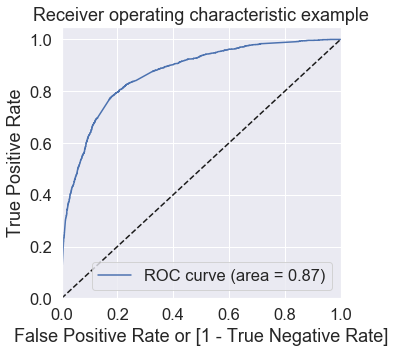

In [94]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_Prob, drop_intermediate = False )
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)


In [95]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,LeadID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.186653,1234,0,1,1,0,0,0,0,0,0,0,0
1,1,0.886884,1824,1,1,1,1,1,1,1,1,1,1,0
2,1,0.411167,3219,0,1,1,1,1,1,0,0,0,0,0
3,0,0.072334,5472,0,1,0,0,0,0,0,0,0,0,0
4,0,0.025021,1257,0,1,0,0,0,0,0,0,0,0,0


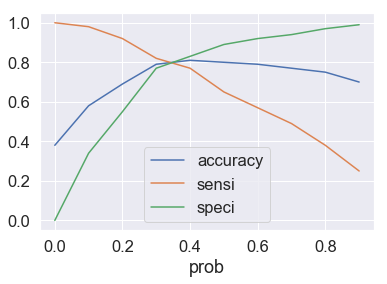

In [96]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

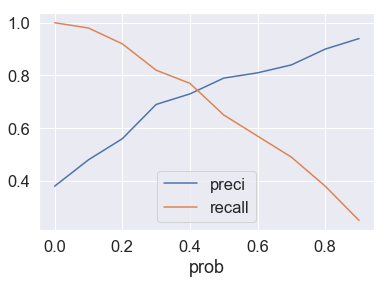

In [97]:
# Lets plot Precision and Recall 
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['preci','recall'])
plt.show()

In [98]:
# Calculate Lead score for train data set values and assign it to dataframe 'y_train_pred_final'


y_train_pred_final['Lead_score'] = round(y_train_pred_final['Converted_Prob']*100,2)

y_train_pred_final.head()

,Converted,Converted_Prob,LeadID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,Lead_score
0,0,0.186653,1234,0,1,1,0,0,0,0,0,0,0,0,18.67
1,1,0.886884,1824,1,1,1,1,1,1,1,1,1,1,0,88.69
2,1,0.411167,3219,0,1,1,1,1,1,0,0,0,0,0,41.12
3,0,0.072334,5472,0,1,0,0,0,0,0,0,0,0,0,7.23
4,0,0.025021,1257,0,1,0,0,0,0,0,0,0,0,0,2.50


## 7. Making predictions on the test set


In [99]:
# Independent and depenendent variable segregation 
y_test = df_test.pop('Converted')
X_test = df_test

In [100]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit','total_page_views']] = scaler.fit_transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit','total_page_views']])

C:\Users\pseesala\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\pseesala\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [101]:
# Review the header for test dataframe
X_test.head()

,Lead_Origin_Landing Page Submission,Lead_Origin_Lead Add Form,Lead_Origin_Lead Import,Lead_Source_Direct Traffic,Lead_Source_Facebook,Lead_Source_Google,Lead_Source_Live Chat,Lead_Source_NC_EDM,Lead_Source_Olark Chat,Lead_Source_Organic Search,...,Asymmetrique_Activity_Index_02.Medium,Asymmetrique_Activity_Index_03.Low,Asymmetrique_Profile_Index_01.High,Asymmetrique_Profile_Index_02.Medium,Asymmetrique_Profile_Index_03.Low,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,total_page_views
6637,1,0,0,1,0,0,0,0,0,0,...,1,0,0,1,0,-0.334128,1.195110,-0.063121,1,-0.484747
887,1,0,0,0,0,1,0,0,0,0,...,1,0,1,0,0,1.772047,-0.592003,0.833754,0,1.544656
3201,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,3.035752,1.234408,1.730629,0,4.069036
3017,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0.087107,0.025533,0.534796,1,0.010230
5208,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,-1.176598,-0.876444,-1.258954,0,-0.880728


In [102]:
# Take the columns from train dataset analysis
X_test = X_test[col]
X_test.head()

,Lead_Origin_Lead Add Form,Lead_Source_Direct Traffic,Lead_Source_Google,Lead_Source_Organic Search,Lead_Source_Referral Sites,Last_Activity_Converted to Lead,Last_Activity_Email Bounced,Last_Activity_Olark Chat Conversation,Last_Notable_Activity_Email Link Clicked,Last_Notable_Activity_Email Opened,Last_Notable_Activity_Page Visited on Website,current_occupation_Working Professional,Asymmetrique_Activity_Index_03.Low,Total Time Spent on Website
6637,0,1,0,0,0,0,0,0,0,1,0,1,0,1.195110
887,0,0,1,0,0,0,0,0,0,1,0,0,0,-0.592003
3201,0,1,0,0,0,0,0,0,0,0,0,0,0,1.234408
3017,0,1,0,0,0,0,0,0,0,0,0,0,0,0.025533
5208,1,0,0,0,0,0,0,0,0,1,0,0,0,-0.876444


In [103]:
# Add constant to test dataset
X_test_sm = sm.add_constant(X_test)

In [104]:
# Predict the values with train dataset model
y_test_pred = res.predict(X_test_sm)

In [105]:
y_test_pred[:10]

6637    0.939180
887     0.147994
3201    0.638294
3017    0.319783
5208    0.885166
4138    0.708352
5144    0.922694
3842    0.385090
4189    0.407053
5135    0.139416
dtype: float64

In [106]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [107]:
# Let's see the header
y_pred_1.head()

,0
6637,0.939180
887,0.147994
3201,0.638294
3017,0.319783
5208,0.885166


In [108]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [109]:
# Putting CustID to index
y_test_df['LeadID'] = y_test_df.index

In [110]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [111]:
# Appending y_test_df and y_pred_1
y_pred_final_test = pd.concat([y_test_df, y_pred_1],axis=1)

In [112]:
y_pred_final_test.head()

,Converted,LeadID,0
0,0,6637,0.939180
1,1,887,0.147994
2,1,3201,0.638294
3,1,3017,0.319783
4,1,5208,0.885166


In [113]:
# Renaming the column 
y_pred_final_test= y_pred_final_test.rename(columns={ 0 : 'Converted_Prob'})

In [114]:
# Rearranging the columns
y_pred_final_test = y_pred_final_test.reindex_axis(['LeadID','Converted','Converted_Prob'], axis=1)

C:\Users\pseesala\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  


In [115]:
# Let's see the head of y_pred_final
y_pred_final_test.head()

,LeadID,Converted,Converted_Prob
0,6637,0,0.939180
1,887,1,0.147994
2,3201,1,0.638294
3,3017,1,0.319783
4,5208,1,0.885166


<B> Note:  To get precision about 80% it is necessary to take probability cut off around 0.6 <B> 

In [116]:
# Take the probability as 0.6
y_pred_final_test['predicted'] = y_pred_final_test.Converted_Prob.map(lambda x: 1 if x > 0.6 else 0)

In [117]:
# Review the header
y_pred_final_test.head()

,LeadID,Converted,Converted_Prob,predicted
0,6637,0,0.939180,1
1,887,1,0.147994,0
2,3201,1,0.638294,1
3,3017,1,0.319783,0
4,5208,1,0.885166,1


In [118]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final_test.Converted, y_pred_final_test.predicted).round(2)

0.79

In [119]:
# Create the confusion matrix
confusion2 = metrics.confusion_matrix(y_pred_final_test.Converted, y_pred_final_test.predicted )
confusion2

array([[1477,  146],
       [ 389,  551]], dtype=int64)

In [120]:
# Creating notations
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [121]:
# Let's see the sensitivity of our logistic regression model
(TP / float(TP+FN)).round(2)

0.59

In [122]:
# Let us calculate specificity
(TN / float(TN+FP)).round(2)

0.91

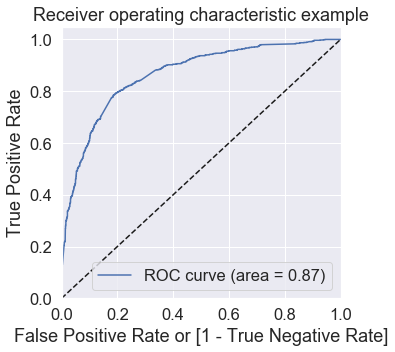

In [123]:
# Roc curve for 
fpr, tpr, thresholds = metrics.roc_curve( y_pred_final_test.Converted, y_pred_final_test.Converted_Prob, drop_intermediate = False )

draw_roc(y_pred_final_test.Converted, y_pred_final_test.Converted_Prob)

In [124]:
# Calcualte precision for test data set 
precision_score(y_pred_final_test.Converted, y_pred_final_test.predicted).round(2)

0.79

In [125]:
# Calculate Lead score for test data set values and assign it to dataframe 'y_pred_final_test'


y_pred_final_test['Lead_score'] = round(y_pred_final_test['Converted_Prob']*100,2)

y_pred_final_test.head()

,LeadID,Converted,Converted_Prob,predicted,Lead_score
0,6637,0,0.939180,1,93.92
1,887,1,0.147994,0,14.80
2,3201,1,0.638294,1,63.83
3,3017,1,0.319783,0,31.98
4,5208,1,0.885166,1,88.52


## 8. Output

<B> 1.Precision 80% achived with probability cut off at 0.6  </B>

In [126]:
print('Precision score for cut off 0.6 is ')
print('--'*20)
print(precision_score(y_train_pred_final.Converted, y_train_pred_final.predicted).round(2))


Precision score for cut off 0.6 is 
----------------------------------------
0.81


<B> 2. Total lead score for both test and train dataset </B>

In [127]:
# concatinate both test and train dataset
y_train_pred_final = y_train_pred_final[['LeadID','Converted','Converted_Prob','Lead_score','predicted']]
y_pred_final_test  = y_pred_final_test[['LeadID','Converted','Converted_Prob','Lead_score','predicted']]

y_pred_final_lead_score = pd.concat([y_train_pred_final,y_pred_final_test])

In [128]:
# Reveiw the lead score 
y_pred_final_lead_score.head()

,LeadID,Converted,Converted_Prob,Lead_score,predicted
0,1234,0,0.186653,18.67,0
1,1824,1,0.886884,88.69,1
2,3219,1,0.411167,41.12,0
3,5472,0,0.072334,7.23,0
4,1257,0,0.025021,2.50,0


<B> 3. What are the top 3 variables and top 3 categorical influenced the model convertion   </B>

In [129]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5979
Model:                            GLM   Df Residuals:                     5964
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2598.7
Date:                Sun, 03 Mar 2019   Deviance:                       5197.4
Time:                        23:26:57   Pearson chi2:                 6.32e+03
No. Iterations:                     6   Covariance Type:             nonrobust
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                             0.5828      0.092      6.328      0.000       0.402       0.763
Lead_Origin_Lead Add Form                         3.0620      0.222     13.790      0.000       2.627       3.497
Lead_Source_Direct Traffic                       -1.3655      0.114    -11.980      0.000      -1.589      -1.142
Lead_Source_Google                               -1.0419      0.109     -9.591      0.000      -1.255      -0.829
Lead_Source_Organic Search                       -1.0356      0.136     -7.625      0.000      -1.302      -0.769
Lead_Source_Referral Sites                       -1.3337      0.373     -3.575      0.000      -2.065      -0.603
Last_Activity_Converted to Lead                  -2.0296      0.220     -9.236      0.000      -2.460      -1.599
Last_Activity_Email Bounced                      -2.9327      0.377     -7.789      0.000      -3.671      -2.195
Last_Activity_Olark Chat Conversation            -2.4282      0.171    -14.219      0.000      -2.763      -2.094
Last_Notable_Activity_Email Link Clicked         -1.3791      0.285     -4.844      0.000      -1.937      -0.821
Last_Notable_Activity_Email Opened               -0.6436      0.076     -8.508      0.000      -0.792      -0.495
Last_Notable_Activity_Page Visited on Website    -1.0689      0.213     -5.027      0.000      -1.486      -0.652
current_occupation_Working Professional           2.8557      0.193     14.772      0.000       2.477       3.235
Asymmetrique_Activity_Index_03.Low               -1.9420      0.265     -7.324      0.000      -2.462      -1.422
Total Time Spent on Website                       1.0942      0.040     27.052      0.000       1.015       1.173
=================================================================================================================
"""

<B> Output : </B>
    
    Below are the top 3  variables influenced convertion
    
    1. Lead_Origin_Lead Add Form
    2. current_occupation_Working Professional
    3. Total Time Spent on Website
 
    
    Below are the top 3 categorical variables influenced convertion
    
    1. Lead_Origin_Lead Add Form
    2. current_occupation_Working Professional
    3. Last_Notable_Activity_Email Opened


<B> 4. Building a strategy for more output with extra resources (interns)  and strategy to reduce calls when goal reached </B>

In [130]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_pred_final_lead_score[i]= y_pred_final_lead_score.Converted_Prob.map(lambda x: 1 if x > i else 0)


In [131]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci','preci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_pred_final_lead_score.Converted, y_pred_final_lead_score[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    preci=cm1[1,1]/(cm1[1,1]+cm1[0,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci,preci]
print(cutoff_df)

     prob  accuracy     sensi     speci     preci
0.0   0.0  0.378366  1.000000  0.000000  0.378366
0.1   0.1  0.579373  0.972463  0.340113  0.472845
0.2   0.2  0.691758  0.919864  0.552919  0.556013
0.3   0.3  0.787052  0.822710  0.765348  0.680922
0.4   0.4  0.804730  0.772277  0.824482  0.728121
0.5   0.5  0.800281  0.649443  0.892090  0.785554
0.6   0.6  0.787403  0.577661  0.915066  0.805436
0.7   0.7  0.772653  0.490099  0.944633  0.843450
0.8   0.8  0.745961  0.375619  0.971375  0.888726
0.9   0.9  0.705104  0.237314  0.989831  0.934227


Adjusting probability cut off to get maximum number of leads (adjusting sensitivity values)

In [132]:
# Check the values using cut off 0.1 to get maximum sensitivity

y_pred_final_lead_score['predicted'] = y_pred_final_lead_score.Converted_Prob.map(lambda x: 1 if x > 0.1 else 0)

# Let's see the head
y_pred_final_lead_score.head()

,LeadID,Converted,Converted_Prob,Lead_score,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1234,0,0.186653,18.67,1,1,1,0,0,0,0,0,0,0,0
1,1824,1,0.886884,88.69,1,1,1,1,1,1,1,1,1,1,0
2,3219,1,0.411167,41.12,1,1,1,1,1,1,0,0,0,0,0
3,5472,0,0.072334,7.23,0,1,0,0,0,0,0,0,0,0,0
4,1257,0,0.025021,2.50,0,1,0,0,0,0,0,0,0,0,0


Adjusting probability cut off to identify only top leads (adjusting specificity values)

In [133]:
# Check the values using cut off 0.9 to get the maximum specificity 

y_pred_final_lead_score['predicted'] = y_pred_final_lead_score.Converted_Prob.map(lambda x: 1 if x > 0.9 else 0)

# Let's see the head
y_pred_final_lead_score.head()

,LeadID,Converted,Converted_Prob,Lead_score,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1234,0,0.186653,18.67,0,1,1,0,0,0,0,0,0,0,0
1,1824,1,0.886884,88.69,0,1,1,1,1,1,1,1,1,1,0
2,3219,1,0.411167,41.12,0,1,1,1,1,1,0,0,0,0,0
3,5472,0,0.072334,7.23,0,1,0,0,0,0,0,0,0,0,0
4,1257,0,0.025021,2.50,0,1,0,0,0,0,0,0,0,0,0


<B> Output </B>

To increase number of potential convertions and to contact them , Focus on the leads which have more than lead score of 10, this way all the potential leads can be contacted and converted. This is the best way to utilize the extra resources allocated.


To reduce the number of calls in off season and to make calls to top leads , Focus on the leads which have more than lead score of 90, these are the top leads which has the best probability among all others. There will be less number of these top leads , hence number of phone calls needed will be less.